## Problem Statement

Credit ratings, issued by financial institutions, provides an assessment about the credit worthiness of an
individual and acts as a pivotal financial indicator.Hence creating a model for predicting Credit Score to classify segment of customers on basis of rating.

## Data Description

**Variable information/Data description**: ID – This feature is an alpha-numeric sort of data which is
uniquely identifying every row entry.<br>
**Customer_ID**: This column is providing an unique id to different customers in our dataset, further it is also
having alpha-numeric data in it.<br>
**Month**: It contains categorical variables, precisely speaking months ranging from January to August. This
means we will be considering the data only of the listed months for our analysis.<br>
**Name**: This column will give us the name of the different customers, and contains name in the categorical
form , also there are repetitions in name column as against each month from Jan to Aug customer name is
provided(which definitely remains same).<br>
**Age**: It is a feature which should give the ages of the customers in years.<br>
**SSN**: Social security number refers to a numerical identifier assigned to U.S. citizens and other residents to
track income and determine benefits.<br>
**Occupation**: Job or profession of a particular individual or the source of income.<br>
**Annual Income**: Total value of income earned during a fiscal year by the individuals.<br>
**Monthly in-hand salary**: The amount of money deposited in the bank account at the end of each month
after all the deductions.<br>
**No of bank accounts**: This variable describes the total number of bank accounts each individual has.<br>
**Interest_Rate**: It is the amount you are charged for borrowing money, shown as a percentage of the total
amount of the loan.<br>
**Num_of_Loan**: Number of loans taken by a customer in a month.<br>
**Type of Loans**: The type of loans the customer opted from the financial institution. (Home equity Loan,
Student Loan, Auto Loan, Credit Builder Loan, Mortgage Loan etc.).<br>
**Delay_from_due_date**: Monthly loan amount payment due by how many days.<br>
**Num_of_Delayed_Payment**: Total number of payments done after the due date.<br>
**Changed_Credit_Limit**: Credit limit refers to the maximum amount of credit a financial institution extends to
a client. Higher the better.<br>
**Num_Credit_Inquiries**: A credit inquiry is a request by an institution for credit report information from a
credit reporting agency.<br>
**Credit_Mix**: Types of different credit accounts you have- mortgages, loans, credit cards etc.<br>
**Outstanding_Debt**: The total principal as well as interest amount of a debt that has yet to be paid.<br>
**Credit_Utilization_Ratio**: The amount of credit you're currently using divided by the total amount of credit
you have available.<br>
**Credit History Age**: It is the number of years that have passed since you opened your first credit account.<br>
**Payment of minimum amount**: 5% of the total outstanding amount is typically considered as the minimum
payment amount a person has to deposit every month. The Yes/No in the dataset indicate the same.<br>
**Total Emi per month**:This refers to the total Maximum amount the person has to pay in order to pay off the loan in a
specified time.<br>
**Amount invested monthly**: this refers to the total average amount the person pays on a monthto-month basis.<br>
**Payment behaviour**: Considers the speed at which customers pay invoices, and how this compares to the
agreed term. If a debtor pays the invoice on average seven days after the due date, we refer to this as a
payment behaviour of +7 days.<br>
**Monthly Balance**: Monthly Balance means the total amount one must pay each month in order to maintain or regain a Grace Period.<br>
**Credit Score**: Gives an assessment about the credit worthiness of an individual.(Target Variable)<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import  statsmodels.api as sm

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,confusion_matrix,classification_report,precision_score

In [2]:
df=pd.read_csv('train.csv')
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [1076]:
df.shape

(100000, 28)

**Interpretation:** The data has 100000 observations and 28 variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Remove Insignificant Variables

#### Dropping 'ID','SSN','Name','Credit_History_Age','Type_of_Loan' columns as they are redundant for further analysis.

In [4]:
df=df.drop(['ID','SSN','Name','Credit_History_Age','Type_of_Loan'],axis=1)
df.head()

Customer_ID     Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40   January    23  Scientist      19114.12            1824.843333   
1   CUS_0xd40  February    23  Scientist      19114.12                    NaN   
2   CUS_0xd40     March  -500  Scientist      19114.12                    NaN   
3   CUS_0xd40     April    23  Scientist      19114.12                    NaN   
4   CUS_0xd40       May    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                  3                4              3           4  ...   
1                  3                4              3           4  ...   
2                  3                4              3           4  ...   
3                  3                4              3           4  ...   
4                  3                4              3           4  ...   

   Num_Credit_Inquiries Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0                   4.0          _           809.98                 26.822620   
1                   4.0       Good           809.98                 31.944960   
2                   4.0       Good           809.98                 28.609352   
3                   4.0       Good           809.98                 31.377862   
4                   4.0       Good           809.98                 24.797347   

  Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                    No           49.574949        80.41529543900253   
1                    No           49.574949       118.28022162236736   
2                    No           49.574949          81.699521264648   
3                    No           49.574949        199.4580743910713   
4                    No           49.574949       41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 23 columns]

In [5]:
#Replacing/Trimming and changing datatypes

#trimming customer ID
df['Customer_ID']=df['Customer_ID'].apply(lambda x: x[6:])

#removing special characters from Age column
df['Age']=df['Age'].str.replace('[_,#,__,-,@,&]','')

#removing special characters from Annual_Income column
df['Annual_Income']=df['Annual_Income'].str.replace('[_,#,__,-,@,&]','')

#removing special characters from Num_of_Loan column
df['Num_of_Loan']=df['Num_of_Loan'].str.replace('[_,#,__,-,@,&]','')

#removing special characters from Num_of_Delayed_Payment column
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('[_,,__,-,]','')
# 644 values[-1,-2,-3] still retain -, so futher replacing and removing the '-'
#-1:316 values, -2:234 values,-3:94 values
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].replace([-1, -3, -2],[1,3,2])

#Replacing 2091 '_' values with null value for further imputation
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)

#Replacing 7062 '_______' values  i.e 7062 values with null value for further imputation
df['Occupation']=df['Occupation'].replace('_______',np.nan)

#Removing [_,,__,-,] characters
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('[_,,__,-,]','')

#Replacing 12007 NM(Not mentioned) values with null value for further imputation
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace('NM',np.nan)

#replacing from [-1,-2,-3,-4,-5] to [1,2,3,4,5]
# -1:210 values,-2:168 values,-3:118 values,-4:62 values,-5:33 values
df['Delay_from_due_date']=df['Delay_from_due_date'].replace([-1,-2,-3,-4,-5],[1,2,3,4,5])

#replacing 4305 __10000__ values with null value for further computation
df['Amount_invested_monthly']=df['Amount_invested_monthly'].replace('__10000__',np.nan)

#replacing 7600 !@9#%8 values with null value for further computation
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)

#Replacing __-333333333333333333333333333__ (9 values) with null value for further imputation
df['Monthly_Balance']=df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

#Replacing -1 to 1 in the Num_Bank_Accounts column
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].replace(-1,1)

##### Imputing missing values in the columns below w.r.t to customer ID

In [6]:
columns=['Age','Occupation','Annual_Income','Monthly_Inhand_Salary','Interest_Rate','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Num_Credit_Inquiries','Credit_Mix']
for i in columns:
    df[i]= df.groupby('Customer_ID')[i].transform(lambda x: x.mode()[0])

In [7]:
df.head(20)

Customer_ID     Month Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0          d40   January  23  Scientist      19114.12            1824.843333   
1          d40  February  23  Scientist      19114.12            1824.843333   
2          d40     March  23  Scientist      19114.12            1824.843333   
3          d40     April  23  Scientist      19114.12            1824.843333   
4          d40       May  23  Scientist      19114.12            1824.843333   
5          d40      June  23  Scientist      19114.12            1824.843333   
6          d40      July  23  Scientist      19114.12            1824.843333   
7          d40    August  23  Scientist      19114.12            1824.843333   
8         21b1   January  28    Teacher      34847.84            3037.986667   
9         21b1  February  28    Teacher      34847.84            3037.986667   
10        21b1     March  28    Teacher      34847.84            3037.986667   
11        21b1     April  28    Teacher      34847.84            3037.986667   
12        21b1       May  28    Teacher      34847.84            3037.986667   
13        21b1      June  28    Teacher      34847.84            3037.986667   
14        21b1      July  28    Teacher      34847.84            3037.986667   
15        21b1    August  28    Teacher      34847.84            3037.986667   
16        2dbc   January  34   Engineer     143162.64           12187.220000   
17        2dbc  February  34   Engineer     143162.64           12187.220000   
18        2dbc     March  34   Engineer     143162.64           12187.220000   
19        2dbc     April  34   Engineer     143162.64           12187.220000   

    Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                   3                4              3           4  ...   
1                   3                4              3           4  ...   
2                   3                4              3           4  ...   
3                   3                4              3           4  ...   
4                   3                4              3           4  ...   
5                   3                4              3           4  ...   
6                   3                4              3           4  ...   
7                   3                4              3           4  ...   
8                   2                4              6           1  ...   
9                   2                4              6           1  ...   
10                  2                4              6           1  ...   
11                  2                4              6           1  ...   
12                  2                4              6           1  ...   
13                  2                4              6           1  ...   
14                  2                4              6           1  ...   
15                  2                4              6           1  ...   
16                  1                5              8           3  ...   
17                  1                5              8           3  ...   
18                  1                5              8           3  ...   
19                  1                5              8           3  ...   

    Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
0                    4.0       Good           809.98   
1                    4.0       Good           809.98   
2                    4.0       Good           809.98   
3                    4.0       Good           809.98   
4                    4.0       Good           809.98   
5                    4.0       Good           809.98   
6                    4.0       Good           809.98   
7                    4.0       Good           809.98   
8                    2.0       Good           605.03   
9                    2.0       Good           605.03   
10                   2.0       Good           605.03   
11                   2.0       Good           605.03   
12                   2.0       Good    

### Datatype conversion

In [1082]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      100000 non-null  fl

In [8]:
df['Age']=df['Age'].astype('int')
df['Annual_Income']=df['Annual_Income'].astype(float)
df['Annual_Income']=df['Annual_Income'].apply(np.ceil)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].astype('object')
df['Num_Credit_Card']=df['Num_Credit_Card'].astype('object')
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].astype('object')

In [9]:
#Rechecking the data types after the conversion.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int32  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  object 
 7   Num_Credit_Card           100000 non-null  object 
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      100000 non-null  ob

In [10]:
#dropping 1048 records where Credit_Mix of the customer_ID throughout all the months is equal to '_'
#df[df['Credit_Mix']=='_']
a=df[df['Credit_Mix']=='_'].index
df.drop(a,inplace=True)

In [11]:
# making a copy of the dataset
df1=df.copy()
print(df1.shape)
print(df1.columns)

(98952, 23)
Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')


## Treating Null Values

In [12]:
df1.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       6928
Changed_Credit_Limit         2061
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount       11885
Total_EMI_per_month             0
Amount_invested_monthly      8683
Payment_Behaviour            7511
Monthly_Balance              1193
Credit_Score                    0
dtype: int64

In [13]:
df1_num = df1.select_dtypes(include=[np.number])
df1_cat = df1.select_dtypes(include=[np.object])


In [1089]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98952 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               98952 non-null  object 
 1   Month                     98952 non-null  object 
 2   Age                       98952 non-null  int32  
 3   Occupation                98952 non-null  object 
 4   Annual_Income             98952 non-null  float64
 5   Monthly_Inhand_Salary     98952 non-null  float64
 6   Num_Bank_Accounts         98952 non-null  object 
 7   Num_Credit_Card           98952 non-null  object 
 8   Interest_Rate             98952 non-null  int64  
 9   Num_of_Loan               98952 non-null  object 
 10  Delay_from_due_date       98952 non-null  int64  
 11  Num_of_Delayed_Payment    92024 non-null  float64
 12  Changed_Credit_Limit      96891 non-null  float64
 13  Num_Credit_Inquiries      98952 non-null  object 
 14  Credit

In [1090]:
df1_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98952 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98952 non-null  int32  
 1   Annual_Income             98952 non-null  float64
 2   Monthly_Inhand_Salary     98952 non-null  float64
 3   Interest_Rate             98952 non-null  int64  
 4   Delay_from_due_date       98952 non-null  int64  
 5   Num_of_Delayed_Payment    92024 non-null  float64
 6   Changed_Credit_Limit      96891 non-null  float64
 7   Outstanding_Debt          98952 non-null  float64
 8   Credit_Utilization_Ratio  98952 non-null  float64
 9   Total_EMI_per_month       98952 non-null  float64
 10  Amount_invested_monthly   90269 non-null  float64
 11  Monthly_Balance           97759 non-null  float64
dtypes: float64(9), int32(1), int64(2)
memory usage: 9.4 MB


In [1091]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98952 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Customer_ID            98952 non-null  object
 1   Month                  98952 non-null  object
 2   Occupation             98952 non-null  object
 3   Num_Bank_Accounts      98952 non-null  object
 4   Num_Credit_Card        98952 non-null  object
 5   Num_of_Loan            98952 non-null  object
 6   Num_Credit_Inquiries   98952 non-null  object
 7   Credit_Mix             98952 non-null  object
 8   Payment_of_Min_Amount  87067 non-null  object
 9   Payment_Behaviour      91441 non-null  object
 10  Credit_Score           98952 non-null  object
dtypes: object(11)
memory usage: 9.1+ MB


In [14]:
from sklearn.impute import SimpleImputer
sim1 = SimpleImputer(strategy = 'median')
sim2 = SimpleImputer(strategy = 'most_frequent')

In [15]:
df1_num = pd.DataFrame(sim1.fit_transform(df1_num), columns = df1_num.columns)
df1_cat = pd.DataFrame(sim2.fit_transform(df1_cat), columns = df1_cat.columns)

In [16]:
df1=pd.concat([df1_num,df1_cat],axis=1)

In [17]:
df1.isnull().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Interest_Rate               0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Customer_ID                 0
Month                       0
Occupation                  0
Num_Bank_Accounts           0
Num_Credit_Card             0
Num_of_Loan                 0
Num_Credit_Inquiries        0
Credit_Mix                  0
Payment_of_Min_Amount       0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [1096]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98952 entries, 0 to 98951
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98952 non-null  float64
 1   Annual_Income             98952 non-null  float64
 2   Monthly_Inhand_Salary     98952 non-null  float64
 3   Interest_Rate             98952 non-null  float64
 4   Delay_from_due_date       98952 non-null  float64
 5   Num_of_Delayed_Payment    98952 non-null  float64
 6   Changed_Credit_Limit      98952 non-null  float64
 7   Outstanding_Debt          98952 non-null  float64
 8   Credit_Utilization_Ratio  98952 non-null  float64
 9   Total_EMI_per_month       98952 non-null  float64
 10  Amount_invested_monthly   98952 non-null  float64
 11  Monthly_Balance           98952 non-null  float64
 12  Customer_ID               98952 non-null  object 
 13  Month                     98952 non-null  object 
 14  Occupa

In [18]:
for i in df1.columns:
    print('Column_Name:',i)
    print('Unique_values:',df1[i].unique())
    print('Len_Unique_values:',(len(df1[i].unique())))
    print()

Column_Name: Age
Unique_values: [23. 28. 34. 55. 21. 31. 30. 44. 40. 33. 35. 39. 37. 20. 46. 26. 41. 32.
 48. 43. 36. 16. 18. 42. 22. 19. 15. 27. 38. 14. 25. 45. 47. 17. 24. 54.
 29. 49. 51. 50. 52. 53. 56.]
Len_Unique_values: 43

Column_Name: Annual_Income
Unique_values: [ 19115.  34848. 143163. ...  37189.  20003.  39629.]
Len_Unique_values: 11384

Column_Name: Monthly_Inhand_Salary
Unique_values: [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
Len_Unique_values: 12359

Column_Name: Interest_Rate
Unique_values: [ 3.  6.  8.  4.  5. 15.  7. 12. 20.  1. 14. 32. 16. 17. 10. 31. 25. 18.
 19.  9. 24. 13. 33. 11. 21. 29. 28. 30. 23. 34.  2. 27. 26. 22.]
Len_Unique_values: 34

Column_Name: Delay_from_due_date
Unique_values: [ 3.  1.  5.  6.  8.  7. 13. 10.  0.  4.  9. 12. 11. 30. 31. 34. 27. 14.
  2. 16. 17. 15. 23. 22. 21. 18. 19. 52. 51. 48. 53. 26. 43. 28. 25. 20.
 47. 46. 49. 24. 61. 29. 50. 58. 45. 59. 55. 56. 57. 54. 62. 65. 64. 67.
 36

# Univariate Analysis 

### Univariate Analysis of Categorical variables

In [1098]:
df1.select_dtypes(include='object').columns

Index(['Customer_ID', 'Month', 'Occupation', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

#### Number of Bank Accounts,Number of Credit card and Number of Loan

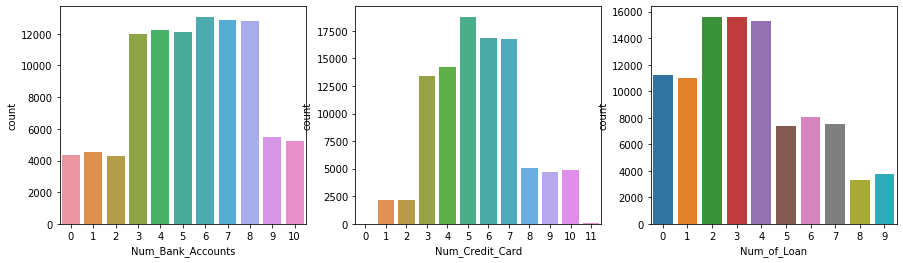

In [1099]:
df_eda = df[['Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan']].astype(int)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

# usin for loop to plot the countplot for each variable
for variable, subplot in zip(df_eda.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_eda[variable], ax = subplot)

# display the plot
plt.show()

1. From above figure we depict that majority of the number of bank accounts lie between 3 to 8 where 6,7 and 8 are highest.
2. Number of credit card frequency is highest at 5 and the majority range between 3 to 7 i.e more than 17500 customers have 5 credit cards.
3. Number of loan frequency is highest at 4, 2 and 3 all three ranging between 15000 and 16000. From above chart we can infer that majority lies between 0 to 4.

#### Number of Credit inquiries,Credit Mix,Payment of minimum amount and Credit Score¶

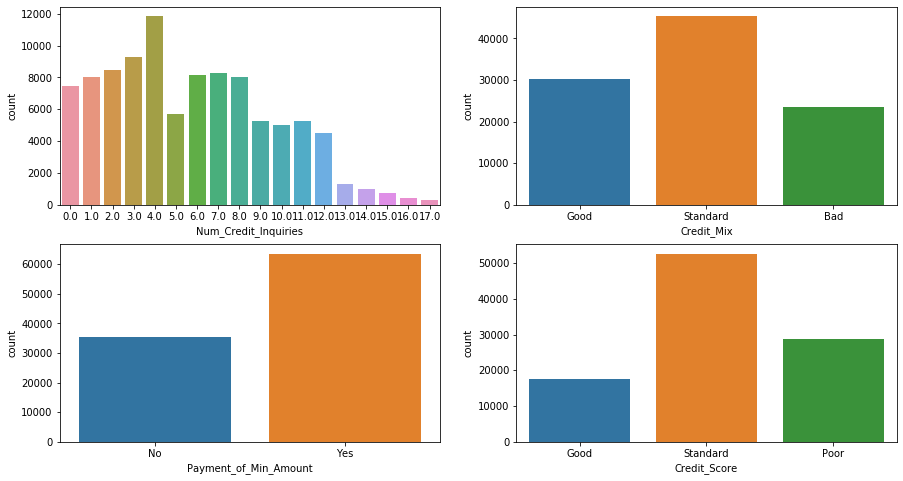

In [1100]:
num_column = df1[['Num_Credit_Inquiries', 'Credit_Mix',
       'Payment_of_Min_Amount','Credit_Score']]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# usin for loop to plot the countplot for each variable
for variable, subplot in zip(num_column.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(num_column[variable], ax = subplot)

# display the plot
plt.show()

1. Most Number of credit inquiries is 4 and least is 17.
2. In credit mix the frequency distribution is Standard > Good > Bad.
3. Most of the customers pay the minimum amount frequency is around 50000. But the number of people not paying minimum amount is also high around 35000.
4. In credit score the frequency distribution is Standard > Poor > Good.

#### Occupation and Payment Behaviour

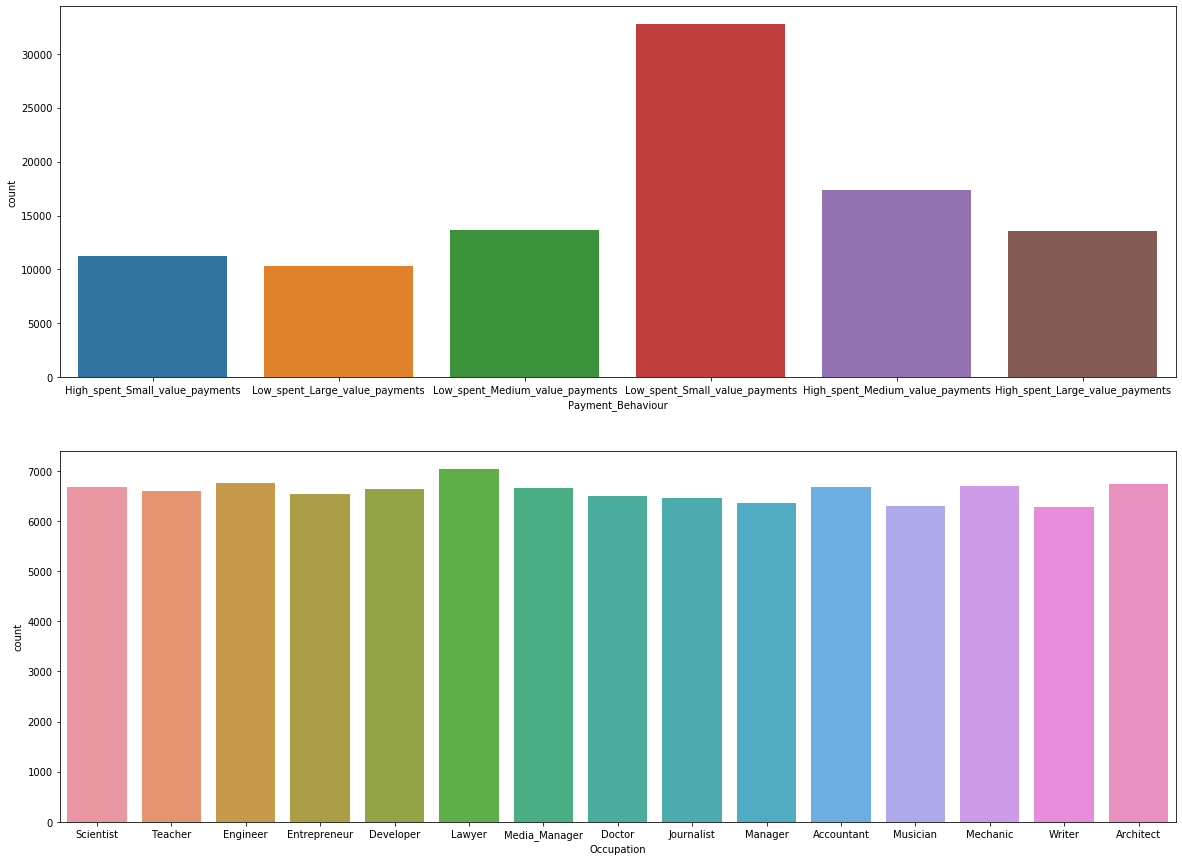

In [1101]:
num_column = df1[['Payment_Behaviour','Occupation']]
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(20,15))

# usin for loop to plot the countplot for each variable
for variable, subplot in zip(num_column.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(num_column[variable], ax = subplot)

# display the plot
plt.show()

1. Payment behaviour is highest in Low spent small value payments then high spent medium value payments and it is least in Low spent large value payments.
2. Data shows a uniform distribution among the occupation of customers, there are very little variation among them. Lawyers are highest in number followed by Engineer,Acccountant,Mechanic,Architect and scientist.

### Univariate Analysis of Numerical Variables¶

In [1102]:
df1.select_dtypes(exclude='object').columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

#### Summary of numerical variables

In [1103]:
df1.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  \
count  98952.000000   98952.000000           98952.000000   98952.000000   
mean      33.293233   50530.450562            4199.295612      14.522516   
std       10.762512   38302.588859            3186.917715       8.738119   
min       14.000000    7006.000000             303.645417       1.000000   
25%       24.000000   19367.000000            1628.847500       7.000000   
50%       33.000000   37058.000000            3097.025000      13.000000   
75%       42.000000   71691.000000            5961.637500      20.000000   
max       56.000000  179988.000000           15204.633333      34.000000   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count         98952.000000            98952.000000          98952.000000   
mean             21.094046               29.785947             10.370954   
std              14.817508              218.470172              6.720654   
min               0.000000               -3.000000             -6.490000   
25%              10.000000                9.000000              5.420000   
50%              18.000000               14.000000              9.410000   
75%              28.000000               18.000000             14.650000   
max              67.000000             4397.000000             36.970000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count      98952.000000              98952.000000         98952.000000   
mean        1426.421741                 32.287261          1404.245856   
std         1154.809464                  5.118234          8306.851620   
min            0.230000                 20.000000             0.000000   
25%          566.210000                 28.053127            30.306460   
50%         1166.640000                 32.309762            69.201730   
75%         1948.880000                 36.499651           161.405543   
max         4998.070000                 50.000000         82331.000000   

       Amount_invested_monthly  Monthly_Balance  
count             98952.000000     98952.000000  
mean                189.739251       401.937648  
std                 191.571123       212.829581  
min                   0.000000         0.007760  
25%                  76.979876       270.937352  
50%                 129.002329       336.823648  
75%                 220.169870       467.992528  
max                1977.326102      1602.040519

#### Summary of categorical variables

In [1104]:
df1.describe(include=object)

Customer_ID     Month Occupation  Num_Bank_Accounts  Num_Credit_Card  \
count        98952     98952      98952              98952            98952   
unique       12369         8         15                 11               12   
top           a7d7  February     Lawyer                  6                5   
freq             8     12369       7040              13072            18768   

       Num_of_Loan  Num_Credit_Inquiries Credit_Mix Payment_of_Min_Amount  \
count        98952               98952.0      98952                 98952   
unique          10                  18.0          3                     2   
top              3                   4.0   Standard                   Yes   
freq         15616               11832.0      45304                 63592   

                     Payment_Behaviour Credit_Score  
count                            98952        98952  
unique                               6            3  
top     Low_spent_Small_value_payments     Standard  
freq                             32762        52598

<function matplotlib.pyplot.show(*args, **kw)>

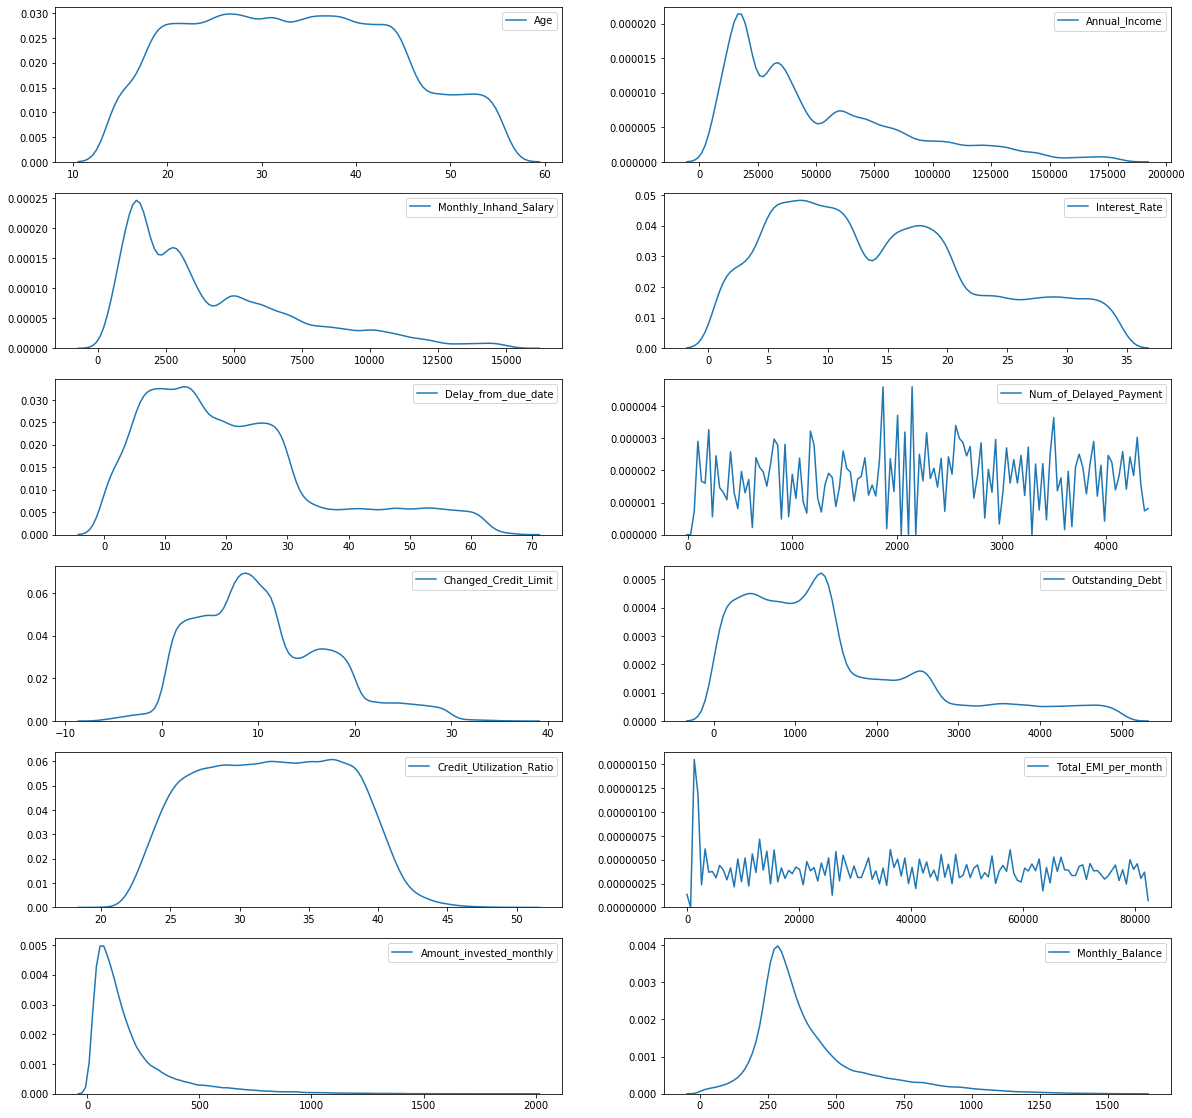

In [1105]:
num_column = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']]

fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(20,20))

# usin for loop to plot the kdetplot for each variable
for variable, subplot in zip(num_column.columns, ax.flatten()):
    
    sns.kdeplot(num_column[variable], ax = subplot)

# display the plot
plt.show


1. From the above kde plot we can infer that Annual Income, Monthly inhand Salary, Annual Invested monthly, Monthly balance, Delay from due date,total emi per month and Outstanding debt are highly right skewed.
2. Changed credit limit is moderately skewed to right.
3. Age and interest rate are somewhat uniformly distributed. Presence of two peaks is found in interest rate.
4. Credit utilization ratio is little skewed to right.

<function matplotlib.pyplot.show(*args, **kw)>

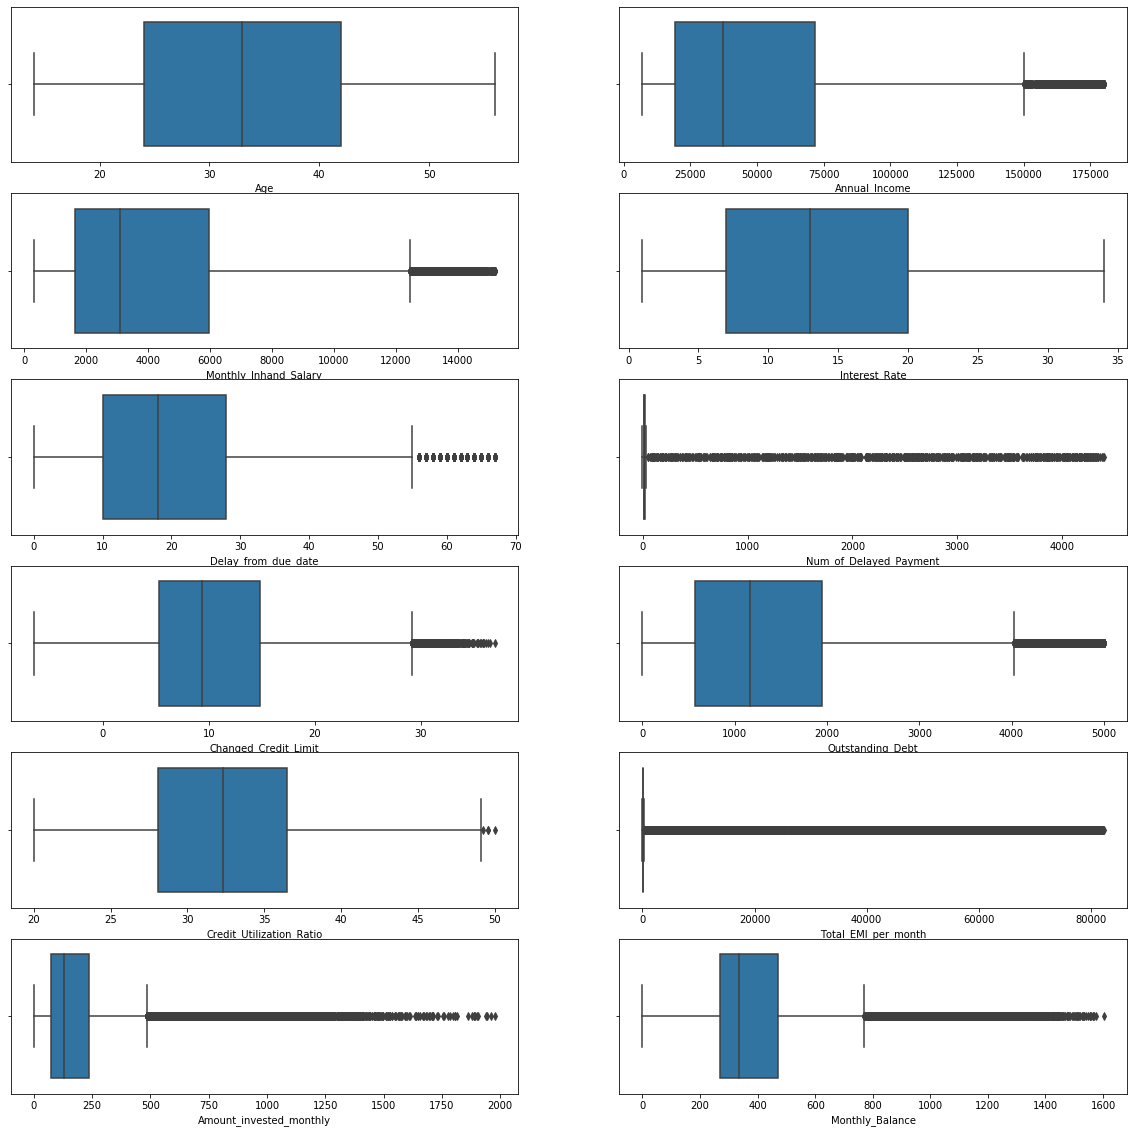

In [1106]:
num_column = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']]
fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(20,20))

# usin for loop to plot the countplot for each variable
for variable, subplot in zip(num_column.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(num_column[variable], ax = subplot)

# display the plot
plt.show


#Outliers detected and needs to ne treated

1.From the boxplot we infer that outliers are present in data except for Age and Interest rate.
2.Presence of outliers is highly dense in Total emi per month, Number of delayed payments in comparison to other variables with outliers.

# Bivariate Analysis

In [1107]:
df1.select_dtypes(include='object').columns

Index(['Customer_ID', 'Month', 'Occupation', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

### Analysis within categorical variables

Text(0.5, 0, 'Occupation')

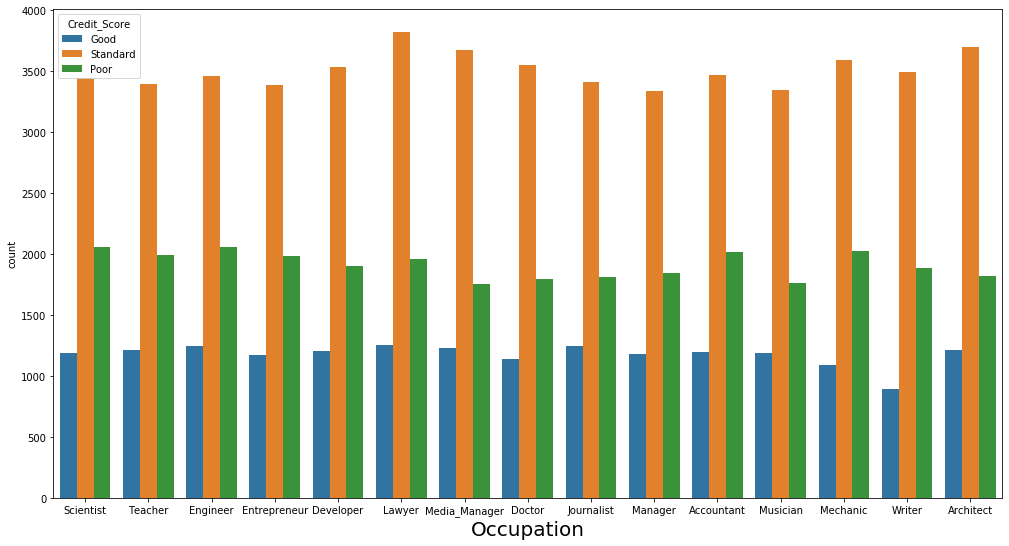

In [1108]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Score")
plt.xlabel("Occupation",fontsize=20)

Text(0.5, 0, 'Month')

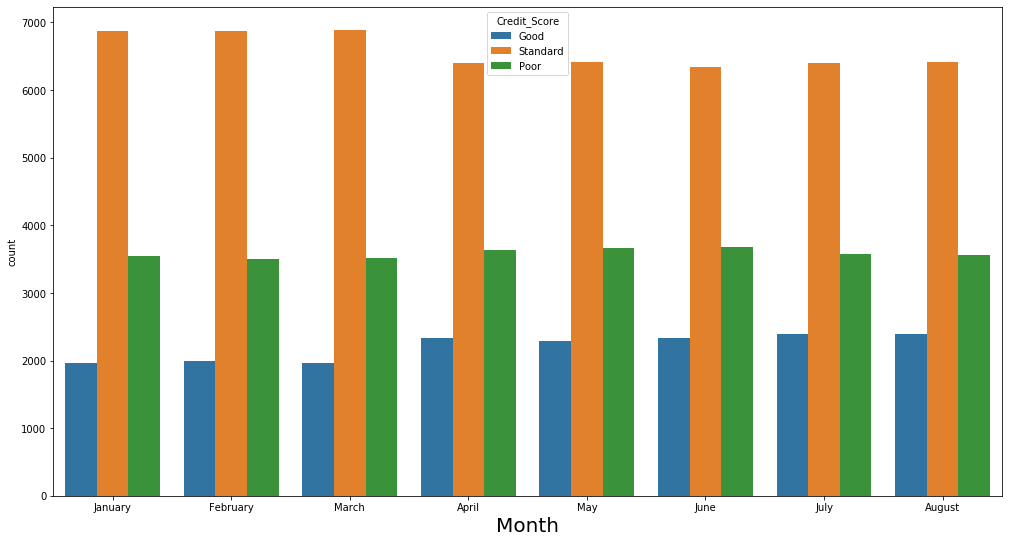

In [1109]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Month",hue="Credit_Score")
plt.xlabel("Month",fontsize=20)

Inference : From almost every occupation "STANDARD" rating is dominating the other two cateogories , followed by Poor and then GOOD.

Text(0.5, 0, 'Credit score')

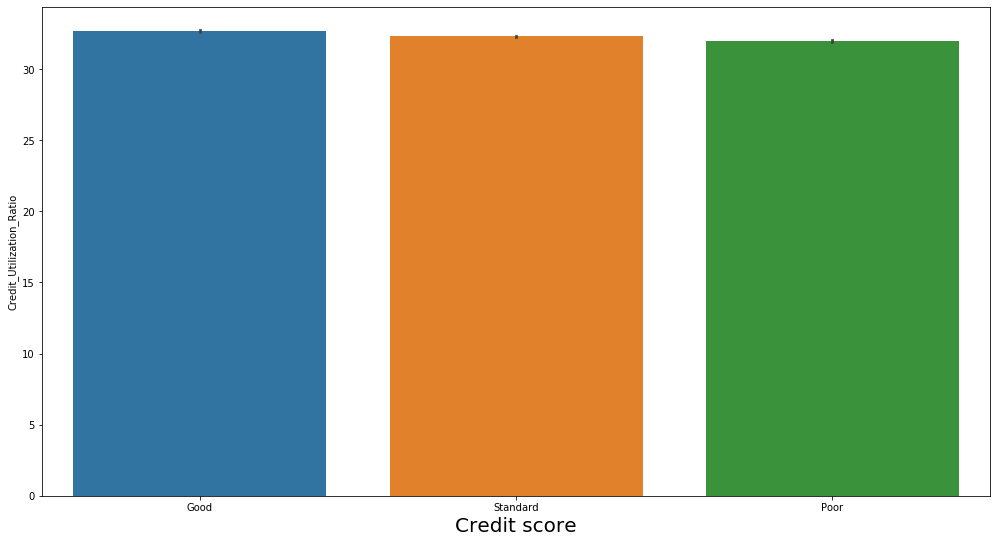

In [1110]:
fig = plt.figure(figsize= (17,9))
sns.barplot(data=df,x="Credit_Score",y="Credit_Utilization_Ratio")
plt.xlabel("Credit score",fontsize=20)

### Bi variate analysis within numerical variables.

<Figure size 1080x1440 with 0 Axes>

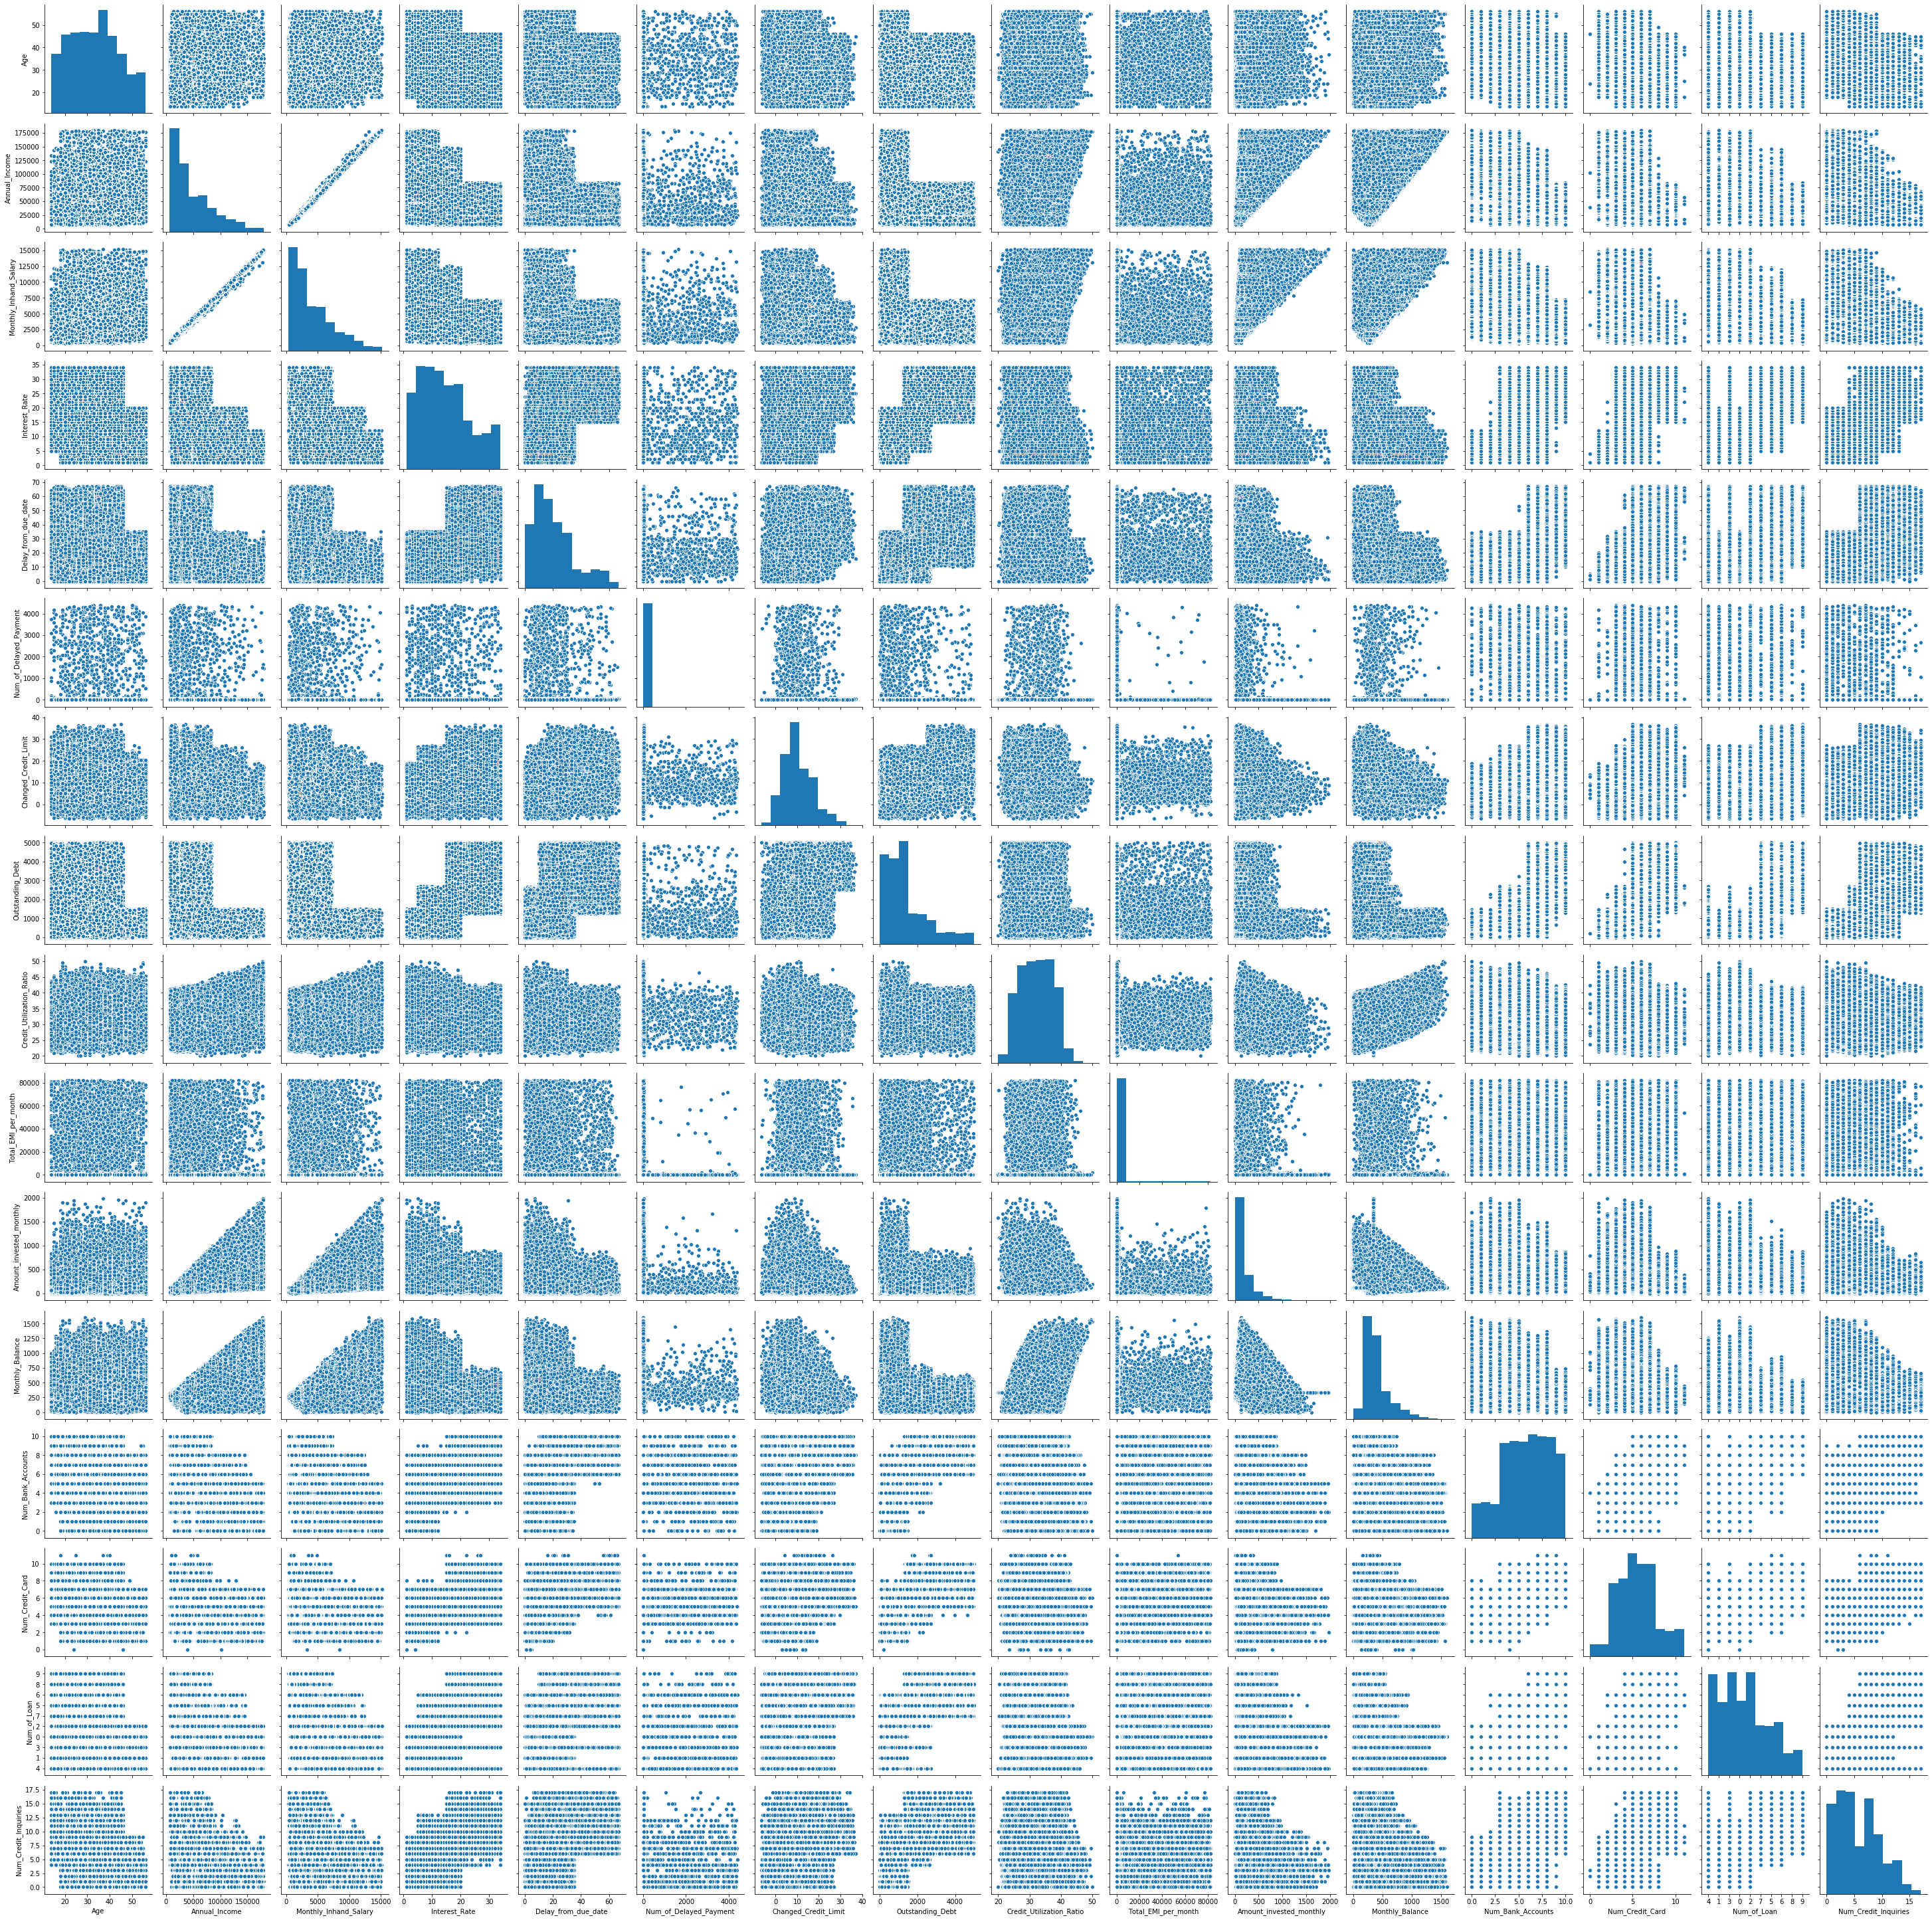

In [1111]:
plt.figure(figsize= (15,20))
sns.pairplot(data=df1)

Here in above pairplot we can observe a high correlation between Annual Income and Monthly inhand salary.

In [1112]:
df1.corr()

Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.092111               0.091077   
Annual_Income             0.092111       1.000000               0.998154   
Monthly_Inhand_Salary     0.091077       0.998154               1.000000   
Interest_Rate            -0.217530      -0.303833              -0.303238   
Delay_from_due_date      -0.173998      -0.250859              -0.250130   
Num_of_Delayed_Payment    0.001337       0.000366               0.000526   
Changed_Credit_Limit     -0.156005      -0.173275              -0.173120   
Outstanding_Debt         -0.202567      -0.269900              -0.269633   
Credit_Utilization_Ratio  0.025942       0.176039               0.176243   
Total_EMI_per_month       0.002301       0.008253               0.007734   
Amount_invested_monthly   0.054695       0.588896               0.589517   
Monthly_Balance           0.116586       0.692860               0.693884   

                          Interest_Rate  Delay_from_due_date  \
Age                           -0.217530            -0.173998   
Annual_Income                 -0.303833            -0.250859   
Monthly_Inhand_Salary         -0.303238            -0.250130   
Interest_Rate                  1.000000             0.588850   
Delay_from_due_date            0.588850             1.000000   
Num_of_Delayed_Payment         0.012552             0.012575   
Changed_Credit_Limit           0.363970             0.290962   
Outstanding_Debt               0.630063             0.572649   
Credit_Utilization_Ratio      -0.075643            -0.063736   
Total_EMI_per_month           -0.004794            -0.003889   
Amount_invested_monthly       -0.184385            -0.153709   
Monthly_Balance               -0.325355            -0.277684   

                          Num_of_Delayed_Payment  Changed_Credit_Limit  \
Age                                     0.001337             -0.156005   
Annual_Income                           0.000366             -0.173275   
Monthly_Inhand_Salary                   0.000526             -0.173120   
Interest_Rate                           0.012552              0.363970   
Delay_from_due_date                     0.012575              0.290962   
Num_of_Delayed_Payment                  1.000000              0.006982   
Changed_Credit_Limit                    0.006982              1.000000   
Outstanding_Debt                        0.009817              0.454693   
Credit_Utilization_Ratio                0.001053             -0.048031   
Total_EMI_per_month                     0.001213             -0.001854   
Amount_invested_monthly                -0.000803             -0.106183   
Monthly_Balance                        -0.002382             -0.199819   

                          Outstanding_Debt  Credit_Utilization_Ratio  \
Age                              -0.202567                  0.025942   
Annual_Income                    -0.269900                  0.176039   
Monthly_Inhand_Salary            -0.269633                  0.176243   
Interest_Rate                     0.630063                 -0.075643   
Delay_from_due_date               0.572649                 -0.063736   
Num_of_Delayed_Payment            0.009817                  0.001053   
Changed_Credit_Limit              0.454693                 -0.048031   
Outstanding_Debt                  1.000000                 -0.071399   
Credit_Utilization_Ratio         -0.071399                  1.000000   
Total_EMI_per_month              -0.005101                  0.001138   
Amount_invested_monthly          -0.163205                 -0.014920   
Monthly_Balance                  -0.313095                  0.251552   

                          Total_EMI_per_month  Amount_invested_monthly  \
Age                                  0.002301                 0.054695   
Annual_Income                        0.008253                 0.588896   
Monthly_Inhand_Salary                0.007734                 0.589517   
Interest_Rate

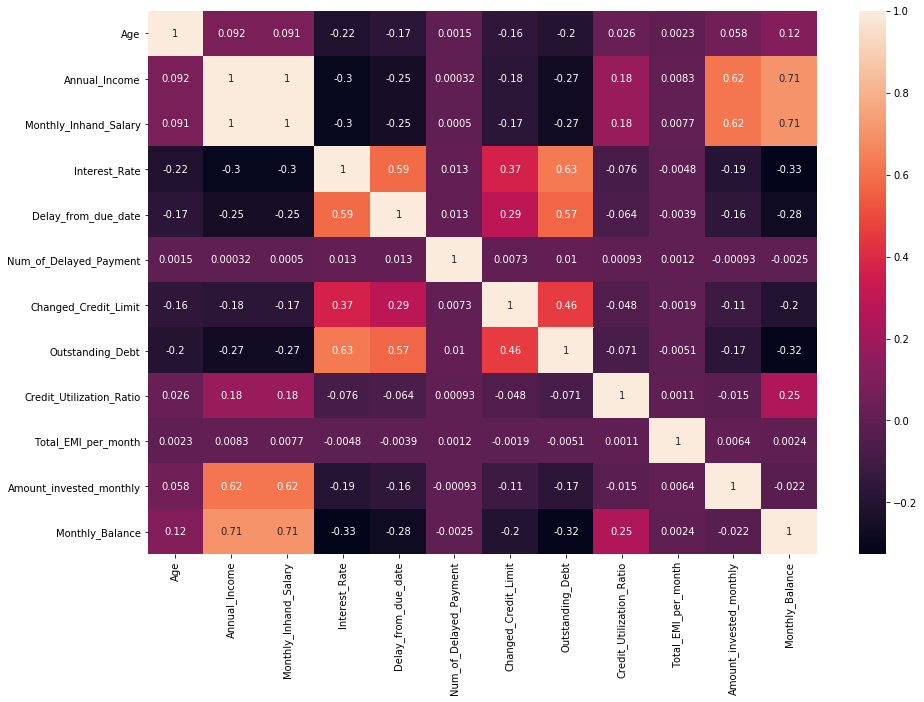

In [1113]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot=True)

Annual Income and Monthly inhand salary variables are highly positively correlated.

In [1114]:
df1.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Customer_ID', 'Month',
       'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

#### Relation of Annual Income and Amount invested monthly

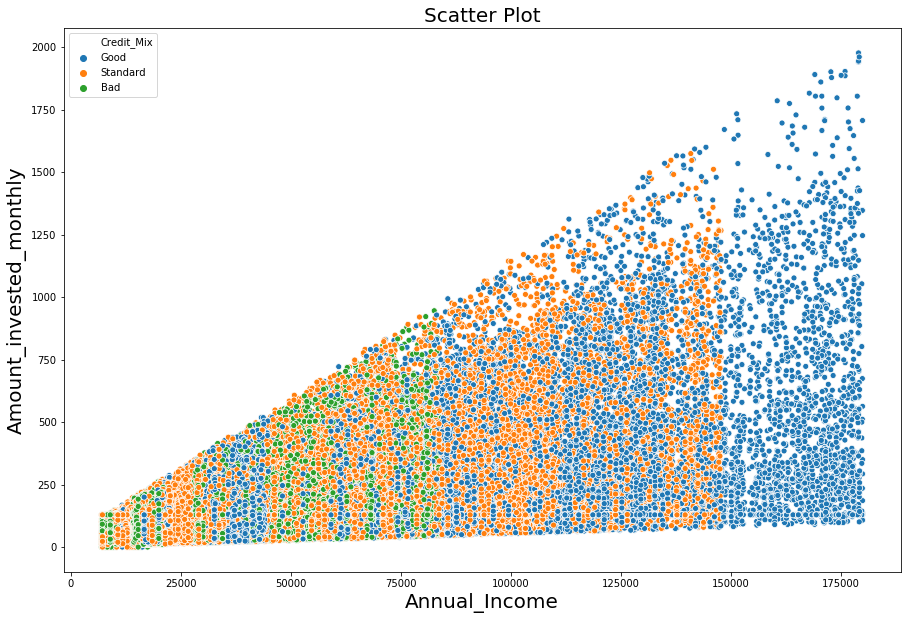

In [1115]:
plt.figure(figsize= (15,10))
sns.scatterplot('Annual_Income','Amount_invested_monthly', data = df1, hue= 'Credit_Mix')

# set label for x-axis
plt.xlabel('Annual_Income', fontsize=20)

# set label for y-axis
plt.ylabel("Amount_invested_monthly", fontsize=20)

# set title
plt.title("Scatter Plot", fontsize=20)

# display the plot
plt.show()

Annual Income and Amount invested monthly shows a positive correlation. Here we can see that all the customer having annual income more than 150000 lie in Good category of credit mix.

#### Relation of Monthly balance and Credit utilization ratio

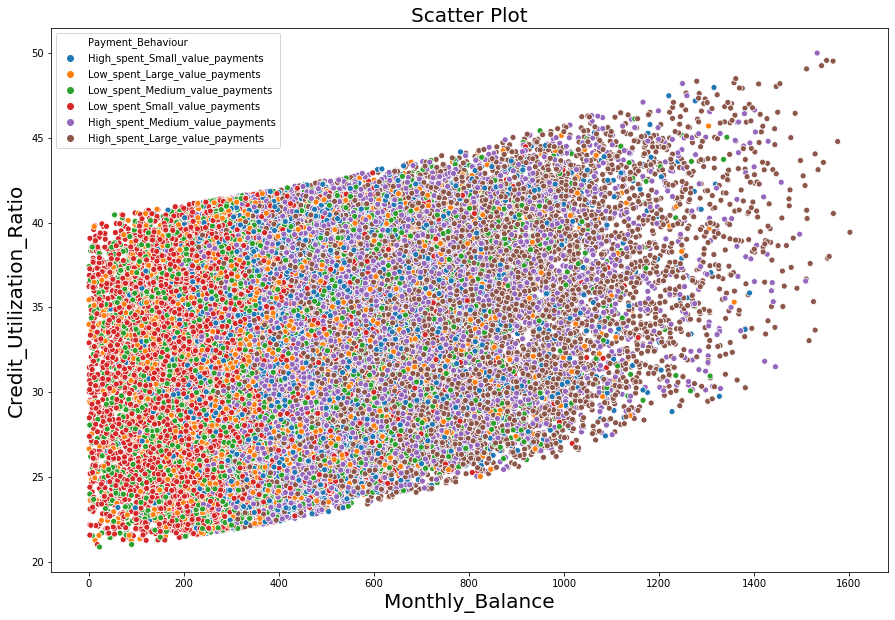

In [1116]:
plt.figure(figsize= (15,10))
sns.scatterplot('Monthly_Balance','Credit_Utilization_Ratio', data = df, hue= 'Payment_Behaviour')

# set label for x-axis
plt.xlabel('Monthly_Balance', fontsize=20)

# set label for y-axis
plt.ylabel('Credit_Utilization_Ratio', fontsize=20)

# set title
plt.title("Scatter Plot", fontsize=20)

# display the plot
plt.show()

Overall a small positive relation can be found here, as the monthly balance increase credit utilization ratio tend to increase. Low spent large value payments and low spent small value payments denisty is higher below monthly balance of 350.

In [1117]:
df.groupby("Occupation").mean()

Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  \
Occupation                                                                      
Accountant     33.528708   50912.984450            4233.670079      14.551435   
Architect      33.490499   52032.330166            4331.613738      13.925178   
Developer      33.324096   50279.015663            4174.840835      14.645783   
Doctor         33.040640   49425.568966            4113.232759      14.477833   
Engineer       32.551479   50757.931361            4219.627857      14.726627   
Entrepreneur   33.279951   50767.572127            4220.841883      14.457213   
Journalist     33.886139   48379.306931            4023.495727      14.466584   
Lawyer         33.952273   49551.280682            4117.305749      14.525000   
Manager        32.879245   51410.059119            4264.428718      14.876730   
Mechanic       33.489260   50118.694511            4165.662109      14.809069   
Media_Manager  33.187500   50704.560096            4214.720513      14.258413   
Musician       33.493655   51534.100254            4274.438410      14.611675   
Scientist      33.387560   51243.383971            4254.222509      14.328947   
Teacher        32.601212   49843.557576            4143.881084      14.513939   
Writer         33.270408   51060.785714            4242.126585      14.692602   

               Delay_from_due_date  Num_of_Delayed_Payment  \
Occupation                                                   
Accountant               21.144139               30.961768   
Architect                20.434382               30.423971   
Developer                21.352108               28.738933   
Doctor                   20.814655               27.630711   
Engineer                 21.770562               28.533365   
Entrepreneur             21.064792               30.046290   
Journalist               20.285118               31.317624   
Lawyer                   20.967330               32.871548   
Manager                  21.256447               33.837563   
Mechanic                 21.313544               30.800704   
Media_Manager            20.929237               34.038655   
Musician                 20.972081               36.148123   
Scientist                21.091956               28.864800   
Teacher                  21.841515               30.256469   
Writer                   21.156409               30.363730   

               Changed_Credit_Limit  Outstanding_Debt  \
Occupation                                              
Accountant                10.796868       1439.060598   
Architect                 10.038214       1340.719929   
Developer                 10.594354       1442.553831   
Doctor                    10.400854       1450.331133   
Engineer                  10.593663       1459.706071   
Entrepreneur               9.996719       1393.274621   
Journalist                10.294194       1447.333478   
Lawyer                    10.349067       1357.772898   
Manager                   10.379537       1462.325031   
Mechanic                  10.355961       1489.364021   
Media_Manager             10.436845       1392.378678   
Musician                  10.221594       1400.010977   
Scientist                 10.210861       1440.033110   
Teacher                   10.596907       1443.983382   
Writer                    10.604610       1443.352181   

               Credit_Utilization_Ratio  Total_EMI_per_month  \
Occupation                                                     
Accountant                    32.291408          1459.822022   
Architect                     32.346483          1584.785493   
Developer                     32.267989          1463.544405   
Doctor                        32.233522          1233.663982   
Engineer                      32.419020          1238.470664   
Entrepreneur                  32.211286          1548.049225   
Journalist                    32.185950          1174.774939   
Lawyer                        32.205513   

In [1118]:
df1.groupby("Credit_Mix").median()

Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  \
Credit_Mix                                                              
Bad         30.0        20686.0            1873.685833           24.0   
Good        37.0        54055.0            4457.680000            6.0   
Standard    32.0        35135.0            2936.170717           14.0   

            Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
Credit_Mix                                                                      
Bad                        38.0                    20.0                 13.34   
Good                        9.0                     8.0                  6.26   
Standard                   19.0                    14.0                 11.12   

            Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
Credit_Mix                                                                    
Bad                  2850.20                 31.767231            99.523250   
Good                  731.46                 32.962858            60.075409   
Standard             1020.01                 32.181181            60.811743   

            Amount_invested_monthly  Monthly_Balance  
Credit_Mix                                            
Bad                      109.704350       275.937065  
Good                     148.954673       418.626234  
Standard                 129.002329       340.239296

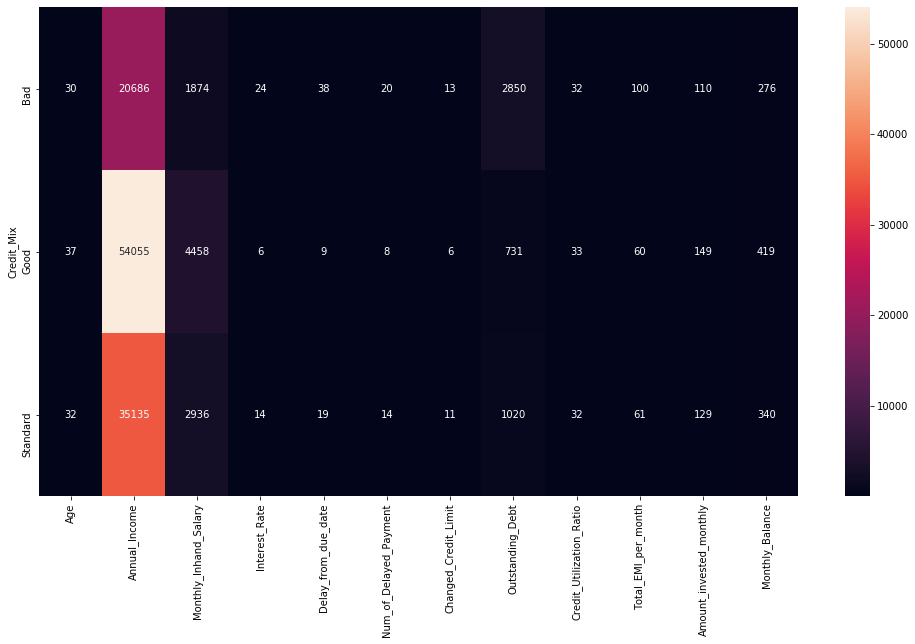

In [1119]:
plt.figure(figsize= (17,9))
sns.heatmap(df1.groupby("Credit_Mix").median(),annot=True,fmt='.0f')

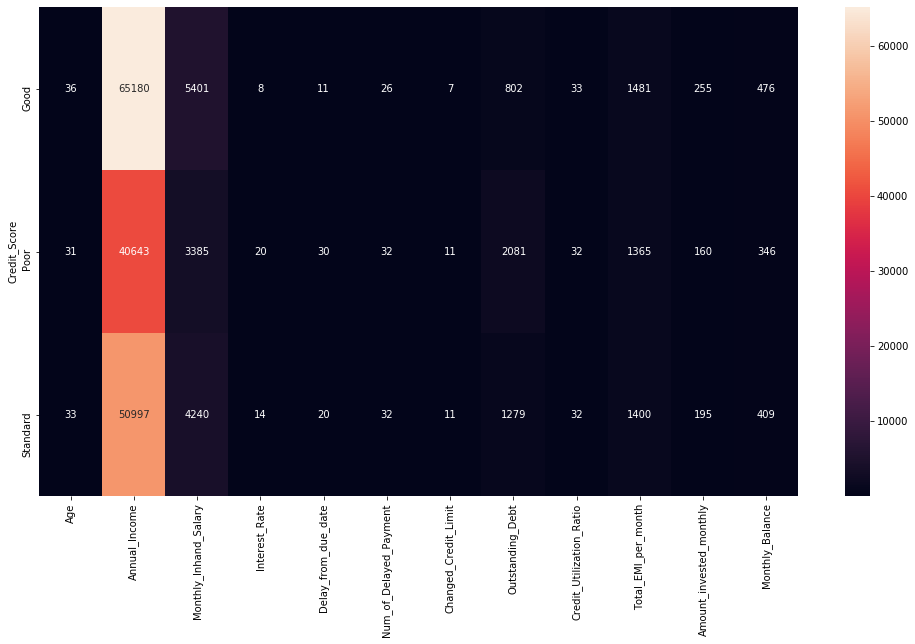

In [1120]:
plt.figure(figsize= (17,9))
sns.heatmap(df.groupby('Credit_Score').mean(),annot=True,fmt='.0f')

In [1121]:
df1.select_dtypes(include='object').columns

Index(['Customer_ID', 'Month', 'Occupation', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

## Treating Multicollinearity

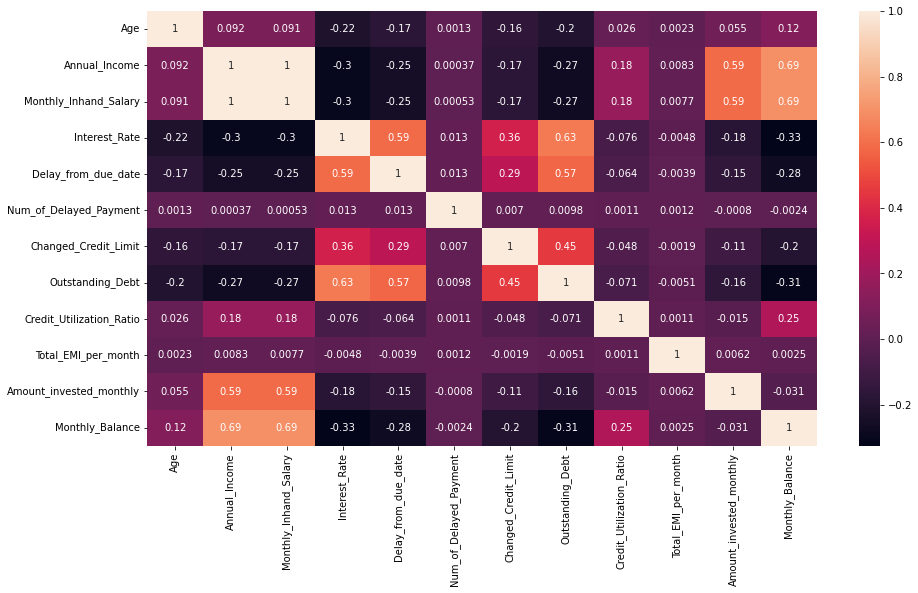

In [19]:
plt.figure(figsize=(15,8))
dfff=df1.select_dtypes(include=['number'])
sns.heatmap(dfff.corr(),annot=True)
plt.show()

In [20]:
correlation=df1.corr()
corr_pairs=correlation.unstack()
strong_p_n_corr = corr_pairs[abs(corr_pairs) > 0.5]
print(strong_p_n_corr)

Age                       Age                         1.000000
Annual_Income             Annual_Income               1.000000
                          Monthly_Inhand_Salary       0.998154
                          Amount_invested_monthly     0.588896
                          Monthly_Balance             0.692860
Monthly_Inhand_Salary     Annual_Income               0.998154
                          Monthly_Inhand_Salary       1.000000
                          Amount_invested_monthly     0.589517
                          Monthly_Balance             0.693884
Interest_Rate             Interest_Rate               1.000000
                          Delay_from_due_date         0.588850
                          Outstanding_Debt            0.630063
Delay_from_due_date       Interest_Rate               0.588850
                          Delay_from_due_date         1.000000
                          Outstanding_Debt            0.572649
Num_of_Delayed_Payment    Num_of_Delayed_Payment      1

In [21]:
df11=df1.select_dtypes(include=['number'])
X = df11[list(df11.columns)]
X

Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  \
0      23.0        19115.0            1824.843333            3.0   
1      23.0        19115.0            1824.843333            3.0   
2      23.0        19115.0            1824.843333            3.0   
3      23.0        19115.0            1824.843333            3.0   
4      23.0        19115.0            1824.843333            3.0   
...     ...            ...                    ...            ...   
98947  25.0        39629.0            3359.415833            7.0   
98948  25.0        39629.0            3359.415833            7.0   
98949  25.0        39629.0            3359.415833            7.0   
98950  25.0        39629.0            3359.415833            7.0   
98951  25.0        39629.0            3359.415833            7.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                      3.0                     7.0                 11.27   
1                      1.0                    14.0                 11.27   
2                      3.0                     7.0                  9.41   
3                      5.0                     4.0                  6.27   
4                      6.0                    14.0                 11.27   
...                    ...                     ...                   ...   
98947                 23.0                     7.0                 11.50   
98948                 18.0                     7.0                 11.50   
98949                 27.0                     6.0                 11.50   
98950                 20.0                    14.0                 11.50   
98951                 18.0                     6.0                 11.50   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0                809.98                 26.822620            49.574949   
1                809.98                 31.944960            49.574949   
2                809.98                 28.609352            49.574949   
3                809.98                 31.377862            49.574949   
4                809.98                 24.797347            49.574949   
...                 ...                       ...                  ...   
98947            502.38                 34.663572            35.104023   
98948            502.38                 40.565631            35.104023   
98949            502.38                 41.255522            35.104023   
98950            502.38                 33.638208            35.104023   
98951            502.38                 34.192463            35.104023   

       Amount_invested_monthly  Monthly_Balance  
0                    80.415295       312.494089  
1                   118.280222       284.629162  
2                    81.699521       331.209863  
3                   199.458074       223.451310  
4                    41.420153       341.489231  
...                        ...              ...  
98947                60.971333       479.866228  
98948                54.185950       496.651610  
98949                24.028477       516.809083  
98950               251.672582       319.164979  
98951               167.163865       393.673696  

[98952 rows x 12 columns]

In [22]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                    Column
2   754.037971     Monthly_Inhand_Salary
1   743.958156             Annual_Income
11   21.167401           Monthly_Balance
8    20.335270  Credit_Utilization_Ratio
0     9.275289                       Age
3     7.206919             Interest_Rate
10    6.797374   Amount_invested_monthly
7     5.206591          Outstanding_Debt
4     5.148747       Delay_from_due_date
6     4.218653      Changed_Credit_Limit
9     1.028318       Total_EMI_per_month
5     1.018764    Num_of_Delayed_Payment

In [23]:
# Dropping Monthly_Inhand_Salary as it is highly correlated with Annual_Income and also VIF value is very high.
# Dropping Monthly_Balance as the VIF value is high.
df1.drop(columns=['Monthly_Inhand_Salary','Monthly_Balance'],inplace=True)

#### Distribution plots along with their skewness before the null value imputation

Annual_Income : 1.1304624563893817


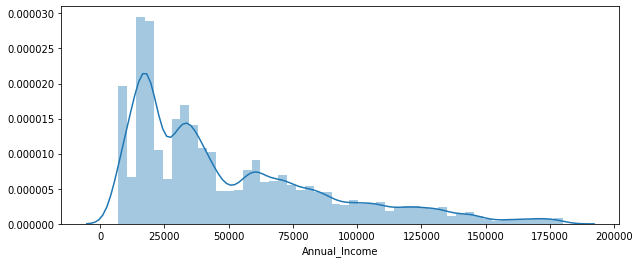

Amount_invested_monthly : 2.5604429584706243


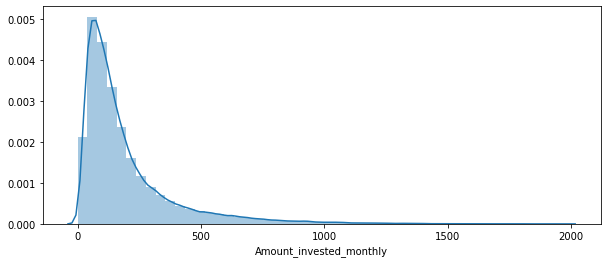

Num_of_Delayed_Payment : 14.30030660340961


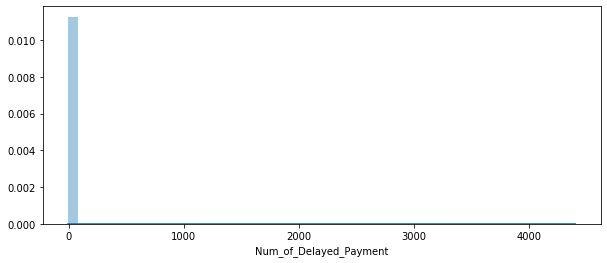

Interest_Rate : 0.4956602977295809


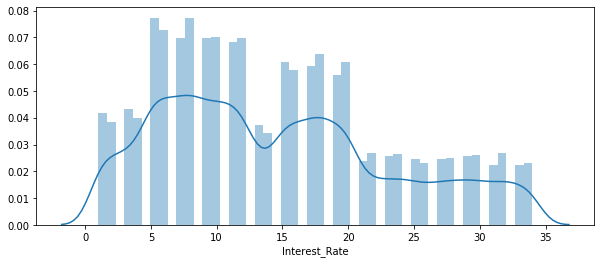

Delay_from_due_date : 0.9770288571682023


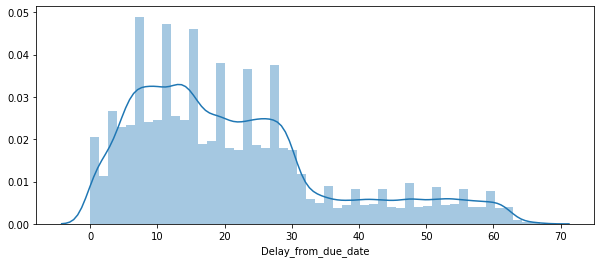

Changed_Credit_Limit : 0.6416074029594567


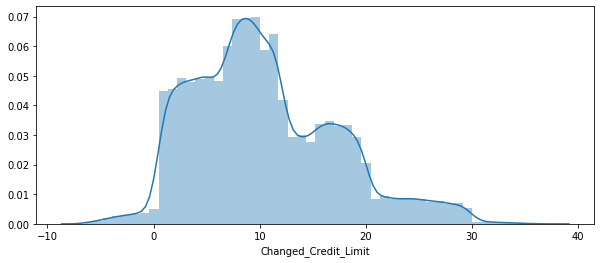

Outstanding_Debt : 1.206433070954387


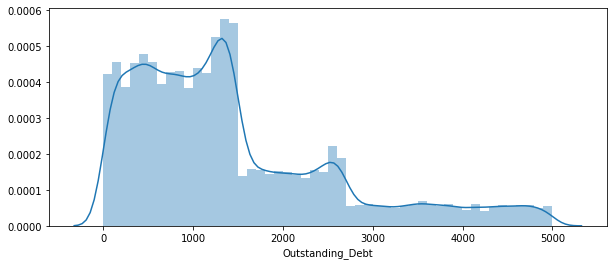

Credit_Utilization_Ratio : 0.027940441689997972


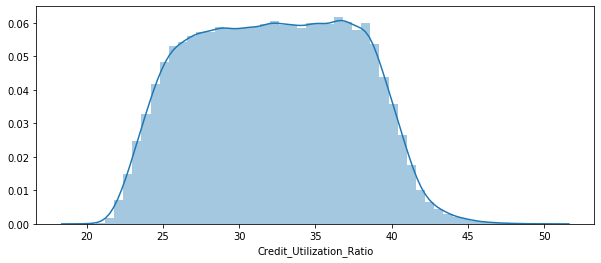

Total_EMI_per_month : 7.097758925106369


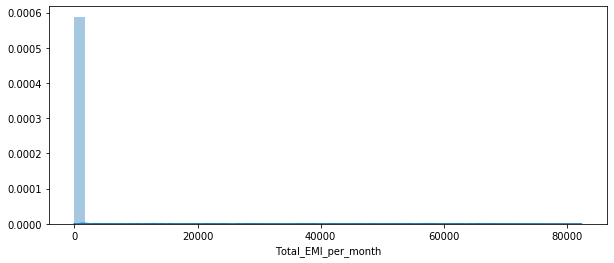

In [1127]:
plt.rcParams['figure.figsize']=[10,4]
columns=['Annual_Income','Amount_invested_monthly','Num_of_Delayed_Payment','Interest_Rate','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month']
for i in columns:
    print(i,':',df[i].skew())
    sns.distplot(df[i])
    plt.show()

#### Distribution plots along with their skewness after the null value imputation

Annual_Income : 1.1304624563893817


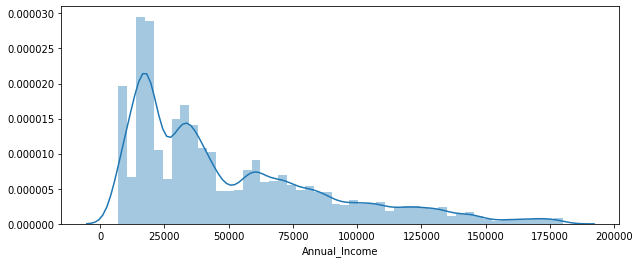

Amount_invested_monthly : 2.7298076323474825


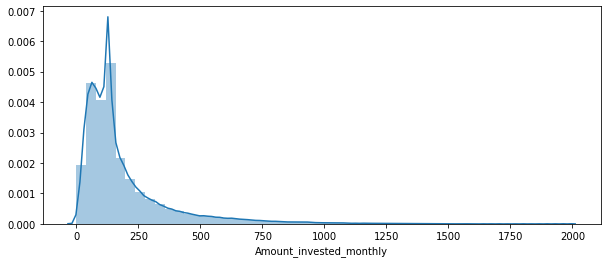

Num_of_Delayed_Payment : 14.836364705430386


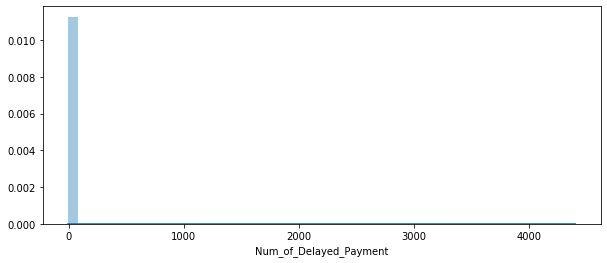

Interest_Rate : 0.4956602977295809


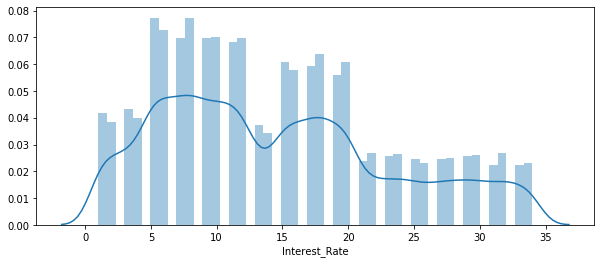

Delay_from_due_date : 0.9770288571682023


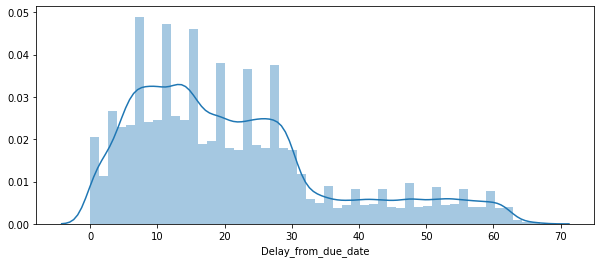

Changed_Credit_Limit : 0.6570320899595669


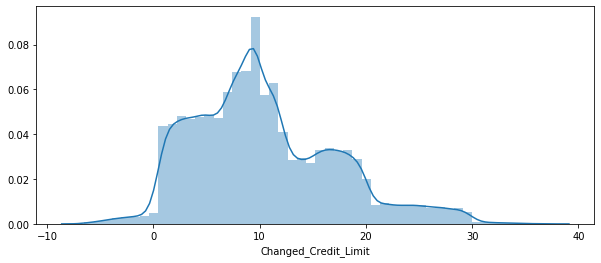

Outstanding_Debt : 1.206433070954387


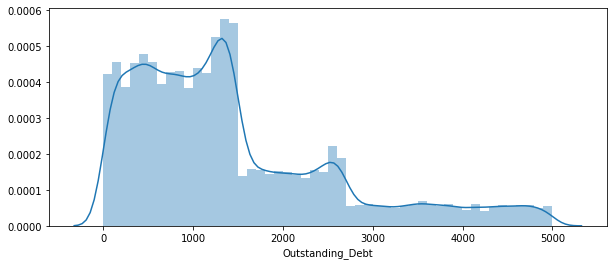

Credit_Utilization_Ratio : 0.027940441689997972


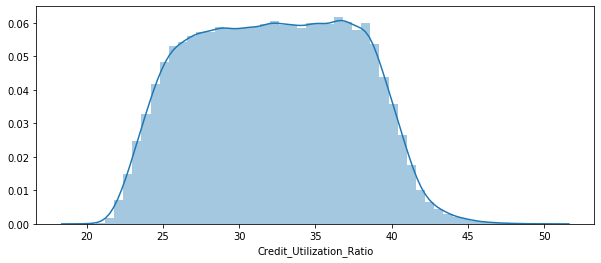

Total_EMI_per_month : 7.097758925106369


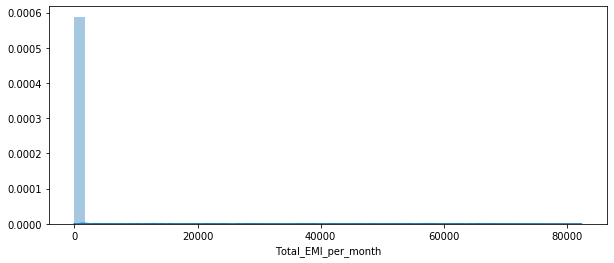

In [1128]:
#Distribution plots along with their skewness after the null value imputation
col=['Annual_Income','Amount_invested_monthly','Num_of_Delayed_Payment','Interest_Rate','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month']
for i in col:
    print(i,':',df1[i].skew())
    sns.distplot(df1[i])
    plt.show()

In [1129]:
# There is no much change in skewness,further transformations are required to deal with skewness

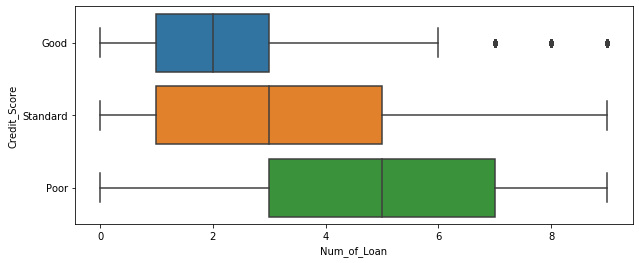

In [1130]:
# Boxplot between number-of-loans and credit-score, showing the distribution of number-of-loans data for each unique credit score.
#converting the datatype to int for analysis
df1['Num_of_Loan']=df1['Num_of_Loan'].astype(int)
sns.boxplot(x=df1.Num_of_Loan,y=df1.Credit_Score)
plt.show()

In [1131]:
#In the above figure, we can see customers having number of loans >= 7 and having Credit score as good are shown as outliers
#treating the outliers
b = df1[(df1.Credit_Score=='Good') & (df1.Num_of_Loan>=7)].index

In [1132]:
#dropping the records where number of loans >= 7 and having Credit score as good 
df1.drop(b,inplace=True)

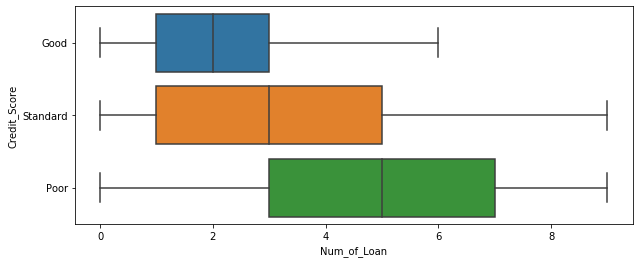

In [1133]:
#after treating the outliers
sns.boxplot(x=df1.Num_of_Loan,y=df1.Credit_Score)
plt.show()

In [24]:
#converting the datatype back to object
df1['Num_of_Loan']=df1['Num_of_Loan'].astype(object)

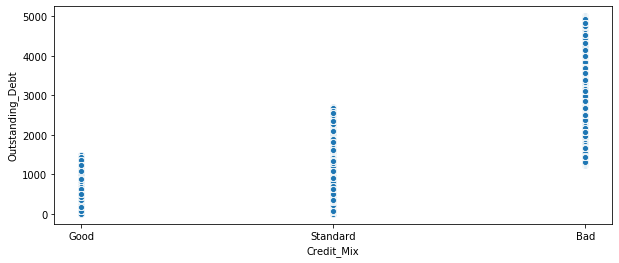

In [1135]:
sns.scatterplot(x=df1.Credit_Mix,y=df1.Outstanding_Debt)
plt.show()
#Customer id's having higher outstanding debt tend to have a bad credit_mix 

In [25]:
df2=df1.copy()
df2.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
0  23.0        19115.0            3.0                  3.0   
1  23.0        19115.0            3.0                  1.0   
2  23.0        19115.0            3.0                  3.0   
3  23.0        19115.0            3.0                  5.0   
4  23.0        19115.0            3.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
0                     7.0                 11.27            809.98   
1                    14.0                 11.27            809.98   
2                     7.0                  9.41            809.98   
3                     4.0                  6.27            809.98   
4                    14.0                 11.27            809.98   

   Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
0                 26.822620            49.574949                80.415295   
1                 31.944960            49.574949               118.280222   
2                 28.609352            49.574949                81.699521   
3                 31.377862            49.574949               199.458074   
4                 24.797347            49.574949                41.420153   

   ...     Month Occupation Num_Bank_Accounts Num_Credit_Card Num_of_Loan  \
0  ...   January  Scientist                 3               4           4   
1  ...  February  Scientist                 3               4           4   
2  ...     March  Scientist                 3               4           4   
3  ...     April  Scientist                 3               4           4   
4  ...       May  Scientist                 3               4           4   

  Num_Credit_Inquiries Credit_Mix Payment_of_Min_Amount  \
0                  4.0       Good                    No   
1                  4.0       Good                    No   
2                  4.0       Good                    No   
3                  4.0       Good                    No   
4                  4.0       Good                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good  

[5 rows x 21 columns]

In [1137]:
df2.shape

(98640, 21)

## Removing Outliers

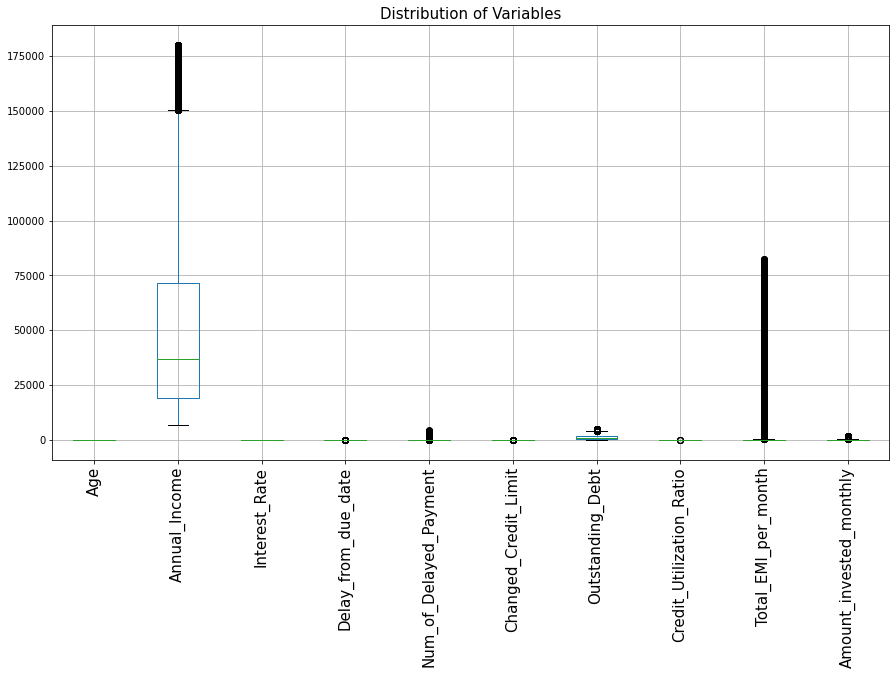

In [26]:
#Boxplots showing the distribution of variables
plt.figure(figsize=(15,8))
df2.boxplot()
plt.title('Distribution of Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

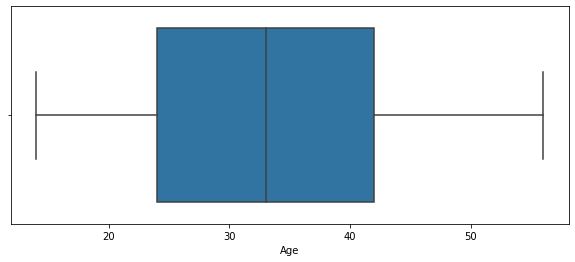

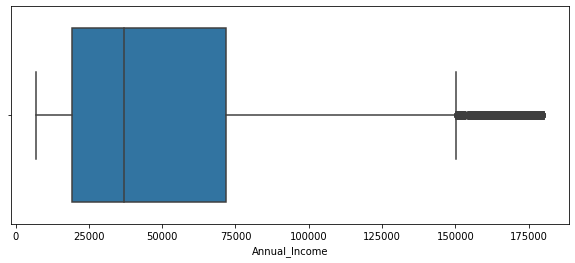

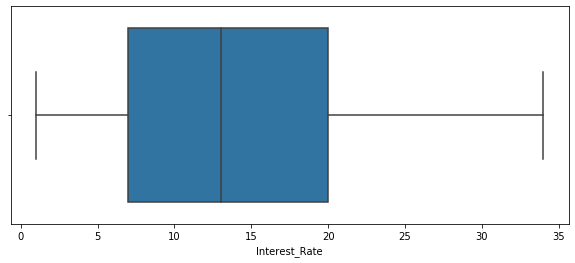

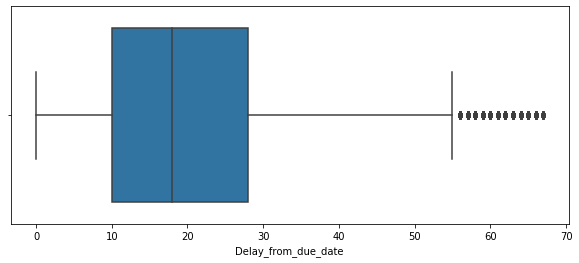

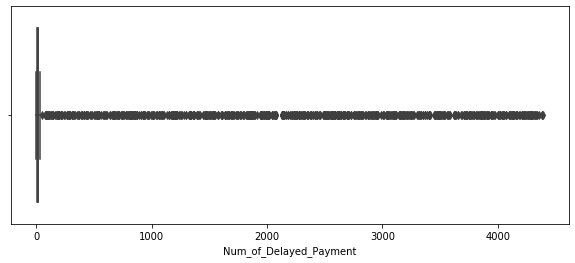

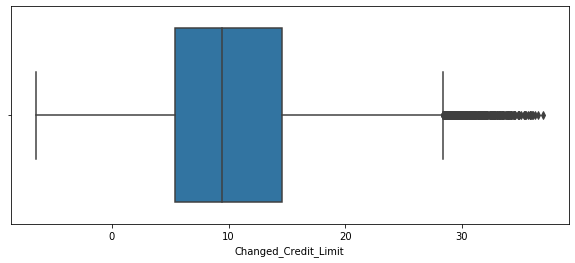

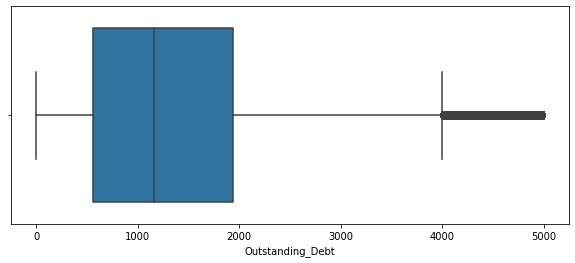

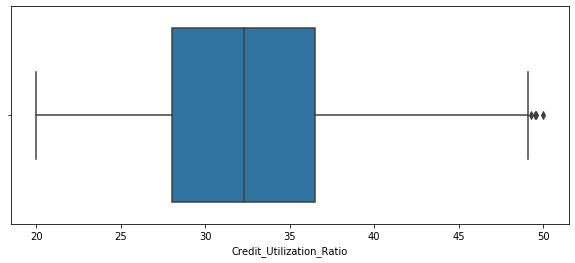

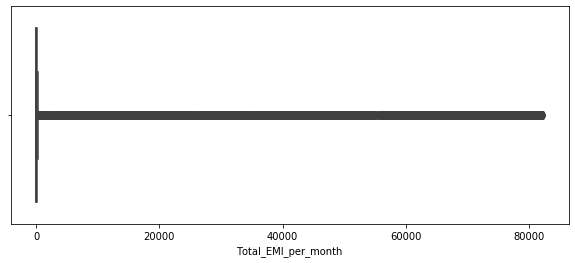

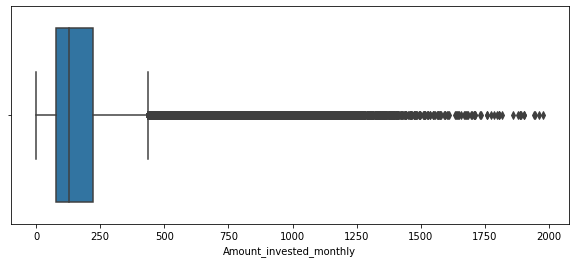

In [1139]:
#boxplots of each numeric column in the data before treating with outliers
for i in df2.select_dtypes(include=[np.number]).columns:
    sns.boxplot(df2[i])
    plt.show()

In [27]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
IQR = Q3 - Q1
# retrieving the dataframe without the outliers
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.shape

(74977, 21)

### df3 is the dataset filtered after the outlier analysis

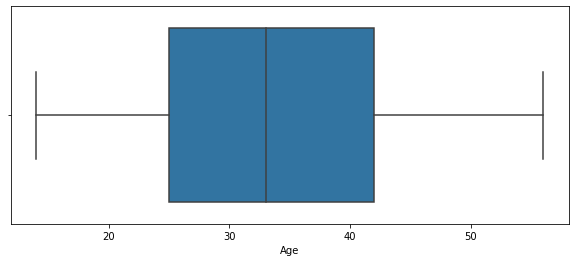

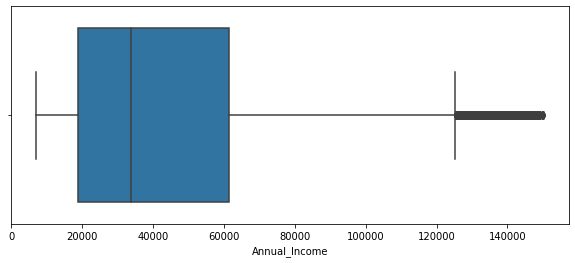

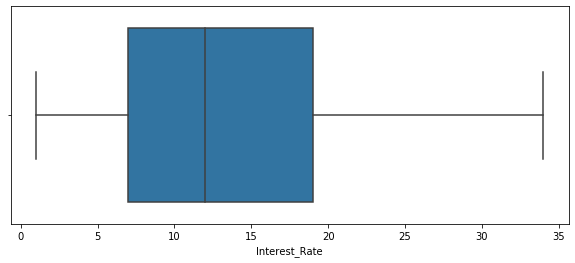

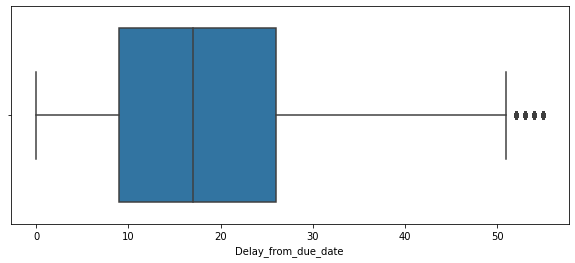

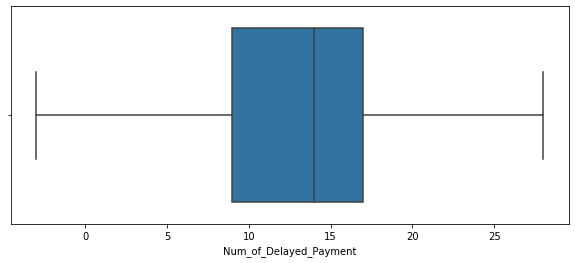

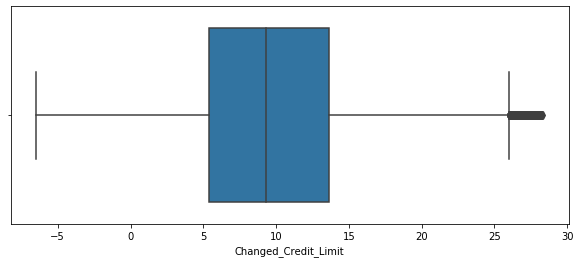

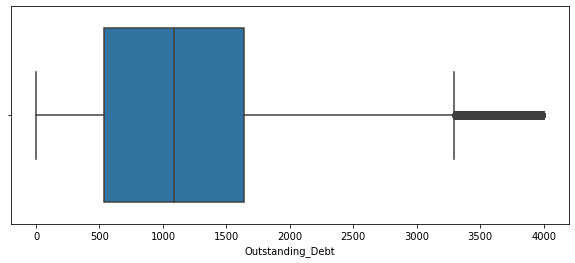

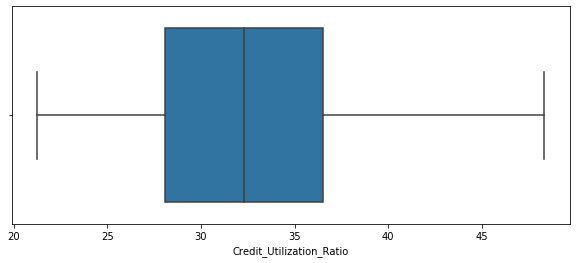

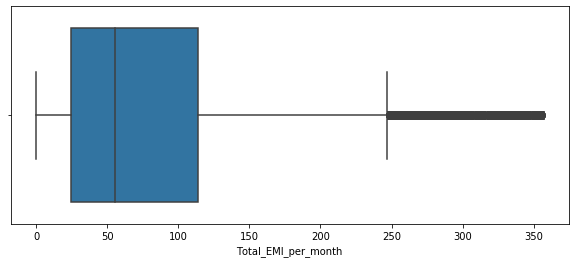

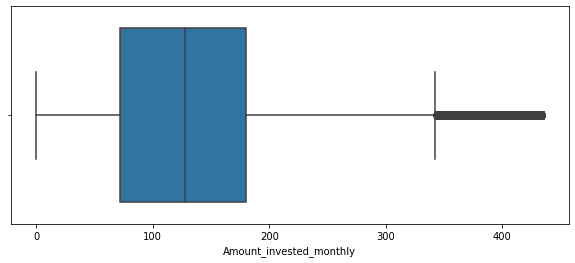

In [1141]:
#boxplots of each numeric column in the data before treating with outliers
for i in df3.select_dtypes(include=[np.number]).columns:
    sns.boxplot(df3[i])
    plt.show()

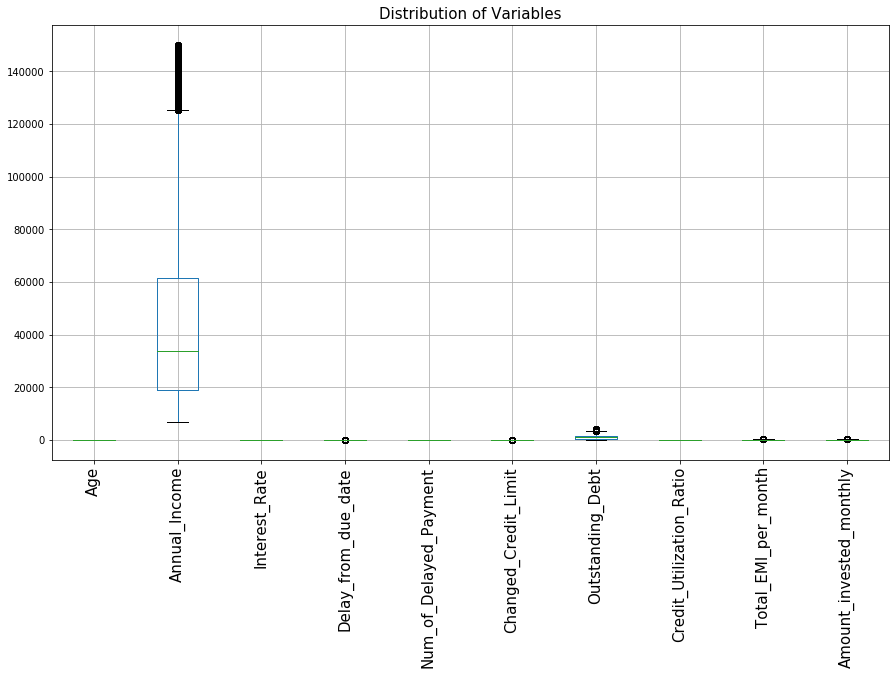

In [1142]:
plt.figure(figsize=(15,8))
df3.boxplot()
plt.title('Distribution of Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [28]:
#dropping customer id column
df3=df3.drop(columns='Customer_ID')

In [29]:
df3.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
0  23.0        19115.0            3.0                  3.0   
1  23.0        19115.0            3.0                  1.0   
2  23.0        19115.0            3.0                  3.0   
3  23.0        19115.0            3.0                  5.0   
4  23.0        19115.0            3.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
0                     7.0                 11.27            809.98   
1                    14.0                 11.27            809.98   
2                     7.0                  9.41            809.98   
3                     4.0                  6.27            809.98   
4                    14.0                 11.27            809.98   

   Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
0                 26.822620            49.574949                80.415295   
1                 31.944960            49.574949               118.280222   
2                 28.609352            49.574949                81.699521   
3                 31.377862            49.574949               199.458074   
4                 24.797347            49.574949                41.420153   

      Month Occupation Num_Bank_Accounts Num_Credit_Card Num_of_Loan  \
0   January  Scientist                 3               4           4   
1  February  Scientist                 3               4           4   
2     March  Scientist                 3               4           4   
3     April  Scientist                 3               4           4   
4       May  Scientist                 3               4           4   

  Num_Credit_Inquiries Credit_Mix Payment_of_Min_Amount  \
0                  4.0       Good                    No   
1                  4.0       Good                    No   
2                  4.0       Good                    No   
3                  4.0       Good                    No   
4                  4.0       Good                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74977 entries, 0 to 98951
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74977 non-null  float64
 1   Annual_Income             74977 non-null  float64
 2   Interest_Rate             74977 non-null  float64
 3   Delay_from_due_date       74977 non-null  float64
 4   Num_of_Delayed_Payment    74977 non-null  float64
 5   Changed_Credit_Limit      74977 non-null  float64
 6   Outstanding_Debt          74977 non-null  float64
 7   Credit_Utilization_Ratio  74977 non-null  float64
 8   Total_EMI_per_month       74977 non-null  float64
 9   Amount_invested_monthly   74977 non-null  float64
 10  Month                     74977 non-null  object 
 11  Occupation                74977 non-null  object 
 12  Num_Bank_Accounts         74977 non-null  object 
 13  Num_Credit_Card           74977 non-null  object 
 14  Num_of

In [31]:
df3['Num_Bank_Accounts']=df3['Num_Bank_Accounts'].astype('int')
df3['Num_Credit_Card']=df3['Num_Credit_Card'].astype('int')
df3['Num_of_Loan']=df3['Num_of_Loan'].astype('int')
df3['Num_Credit_Inquiries']=df3['Num_Credit_Inquiries'].astype('int')

In [90]:
df4=df3.copy()

## Encoding Categorical variables

In [32]:
df3=pd.get_dummies(data=df3,columns=['Month','Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'],drop_first=True)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74977 entries, 0 to 98951
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 74977 non-null  float64
 1   Annual_Income                                       74977 non-null  float64
 2   Interest_Rate                                       74977 non-null  float64
 3   Delay_from_due_date                                 74977 non-null  float64
 4   Num_of_Delayed_Payment                              74977 non-null  float64
 5   Changed_Credit_Limit                                74977 non-null  float64
 6   Outstanding_Debt                                    74977 non-null  float64
 7   Credit_Utilization_Ratio                            74977 non-null  float64
 8   Total_EMI_per_month                                 74977 non-null  float64


# HypothesisTesting

We are considering 5% Level of significance for Hypothesis testing

In [1149]:
#### Creating a copy of dataset
df_hypo=df4.copy()
df_hypo.shape

(74734, 20)

#### 1) if outstanding debt varies with credit score - ANNOVA

H0 : Credit Score is Independent of outstadning debt.

H1 : Credit Score is dependent on outstanding debt.

In [1150]:
df_hypo.groupby(df.Credit_Score)['Outstanding_Debt'].describe()

count         mean         std   min     25%      50%  \
Credit_Score                                                            
Good          13119.0  1217.857671  866.827280  0.54  551.66  1090.80   
Poor          21325.0  1248.847652  912.575470  0.23  529.01  1102.66   
Standard      39477.0  1218.286480  881.341664  0.54  536.03  1082.86   

                  75%      max  
Credit_Score                    
Good          1614.96  3985.22  
Poor          1703.06  3991.35  
Standard      1595.91  3997.22

In [1151]:
dfg_hyp1= df_hypo[df_hypo.Credit_Score=='Good']['Outstanding_Debt']
dfp_hyp1= df_hypo[df_hypo.Credit_Score=='Poor']['Outstanding_Debt']
dfs_hyp1= df_hypo[df_hypo.Credit_Score=='Standard']['Outstanding_Debt']
print(len(dfg_hyp1))
print(len(dfp_hyp1))
print(len(dfs_hyp1))

12995
20918
40821


Test of Normality ( population data is normal) - Shapiro

H0: pop data = normal

H1: pop data !=normal

In [1152]:
print(st.shapiro(dfg_hyp1))
print(st.shapiro(dfp_hyp1))
print(st.shapiro(dfs_hyp1))

(0.9290072321891785, 0.0)
(0.9871426224708557, 3.832443399946622e-39)
(0.8832830190658569, 0.0)


From the above results of p_value for each series of data we can conclude that

p_value<alpha(0.05)

We reject the null hypothesis(H0)

We can conclude that the data is not following normal distribution

We can still go with Anova test as the sample size is greater than 30 also we can reduce the level of significance to 1% as this will help us to not commit a Type-I error (Type 1 error-Possibility of rejecting True 'H0')

Carrying out Levene-test to check for unifomity in the variances

Test of variance Equality: Levene test

H0: dfg_hyp1_var = dfp_hyp1_var= dfs_hyp1_var

H1: any two are different

In [1153]:
print(st.levene(dfg_hyp1,dfp_hyp1,dfs_hyp1))
#since p_value(0.0)<0.05 --->reject H0

LeveneResult(statistic=1389.2500704449865, pvalue=0.0)


In [1154]:
## As we are failing the normality test(shapiro) and the equal population variance test(Levene)

## We can go for Kruskal-Wallis Test

print(st.kruskal(dfg_hyp1,dfp_hyp1,dfs_hyp1))

KruskalResult(statistic=14972.123264758944, pvalue=0.0)


#### Conclusion
From the statitical values obtained by carrying out Kruskal-Wallis Test, we can infer that

p_value(0.0)<alpha(0.05)   

We reject 'H0'

We can conclude that the 'Credit-Score' is dependant on 'Outstanding Debt'

#### 2)is the propotion of customer failing to pay the min amount 40% - one sample z proportion test

In [1155]:
round(df.Payment_of_Min_Amount.value_counts(normalize=True)*100,2)

Yes    59.39
No     40.61
Name: Payment_of_Min_Amount, dtype: float64

H0 : proportion of customer failing to min amount = 40% 

H1 : proportion of customer failing to min amount != 40%

In [1156]:
P=0.4
alpha=0.05
x= df_hypo.Payment_of_Min_Amount[df_hypo.Payment_of_Min_Amount=='No'].count()
n= len(df_hypo.Payment_of_Min_Amount)

In [1157]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(x,n,P)

(-15.414666445671957, 1.3044261102294008e-53)

##### Conclusion
since p_value(2.04e-152)<alpha(0.05) reject H0

Conclusion -> Customer failing to pay min amount is not 40%

#### 3)Does the annual income affects the credit_score of customer. ANNOVA

H0 : Credit Score is independent of annual income 
    
H1 : Credit Score is dependent on annual income

In [1158]:
df_hypo.groupby(df.Credit_Score)['Annual_Income'].describe()

count          mean           std     min      25%      50%  \
Credit_Score                                                                  
Good          13119.0  45427.114948  32749.500579  7057.0  19268.0  34839.0   
Poor          21325.0  42693.565674  31315.619366  7006.0  18332.0  32830.0   
Standard      39477.0  44190.536008  32174.090862  7006.0  18980.0  33950.0   

                  75%       max  
Credit_Score                     
Good          63676.0  149617.0  
Poor          60225.0  150132.0  
Standard      61870.0  149617.0

In [1159]:
dfg_hyp3= df_hypo[df_hypo.Credit_Score=='Good']['Annual_Income']
dfp_hyp3= df_hypo[df_hypo.Credit_Score=='Poor']['Annual_Income']
dfs_hyp3= df_hypo[df_hypo.Credit_Score=='Standard']['Annual_Income']
print(len(dfg_hyp3))
print(len(dfp_hyp3))
print(len(dfs_hyp3))

12995
20918
40821


Test of Normality ( population data is normal) - Shapiro

H0: pop data = normal

H1: pop data !=normal

In [1160]:
print(st.shapiro(dfg_hyp3))
print(st.shapiro(dfg_hyp3))
print(st.shapiro(dfg_hyp3))

(0.8761191368103027, 0.0)
(0.8761191368103027, 0.0)
(0.8761191368103027, 0.0)


From the above results of p_value for each series of data we can conclude that

p_value<alpha(0.05)

We reject the null hypothesis(H0)

We can conclude that the data is not following normal distribution

We can still go with Anova test as the sample size is greater than 30 also we can reduce the level of significance to 1% as this will help us to not commit a Type-I error (Type 1 error-Possibility of rejecting True 'H0')

Carrying out Levene-test to check for unifomity in the variances

Test of variance Equality: Levene test

H0: dfg_hyp3_var = dfp_hyp3_var= dfs_hyp3_var

H1: any two are different

In [1161]:
print(st.levene(dfg_hyp3,dfp_hyp3,dfs_hyp3))

#since p_value(0.0)<0.05 --->reject H0

LeveneResult(statistic=273.36500901939525, pvalue=5.143491297010659e-119)


In [1162]:
## As we are failing the normality test(shapiro) and the equal population variance test(Levene)

## We can go for Kruskal-Wallis Test

print(st.kruskal(dfg_hyp3,dfp_hyp3,dfs_hyp3))

KruskalResult(statistic=2038.4212160111413, pvalue=0.0)


#### Conclusion
From the statitical values obtained by carrying out Kruskal-Wallis Test, we can infer that

p_value(0.0)<alpha(0.05)   

We reject 'H0'

We can conclude that the 'Credit-Score' is dependant on 'Annual_Income' 

####  4)Is the 'Credit_Score' varying with 'Delay_From_Due_Date'

In [1163]:
df_hypo.groupby('Credit_Score')['Delay_from_due_date'].describe()

count       mean        std  min   25%   50%   75%   max
Credit_Score                                                            
Good          12995.0  10.445710   7.392930  0.0   5.0   9.0  14.0  54.0
Poor          20918.0  26.308968  13.940664  0.0  16.0  24.0  36.0  55.0
Standard      40821.0  18.169006  10.795862  0.0  10.0  17.0  25.0  55.0

Framing the Hypothesis 

H0: The 'Credit_Score' is Independant of the 'Delay_From_Due_Date'.

H1: The 'Credit_Score' is Dependant on the 'Delay_From_Due_Date'.

In [1164]:
## Dividing the dataframe to series of  'Delay_From_Due_Date' wrt to 'Credit_Score'

df_g= df_hypo[df_hypo.Credit_Score=='Good']['Delay_from_due_date']
df_p= df_hypo[df_hypo.Credit_Score=='Poor']['Delay_from_due_date']
df_s= df_hypo[df_hypo.Credit_Score=='Standard']['Delay_from_due_date']

print(len(df_g))
print(len(df_p))
print(len(df_s))

12995
20918
40821


Test of Normality ( population data is normal) - Shapiro

H0: pop data = normal

H1: pop data !=normal  ( use p value approach to take a decision) 

In [1165]:
#### carrying Out shapiro test for the data
print(st.shapiro(df_g))
print(st.shapiro(df_p))
print(st.shapiro(df_s))

(0.9294360876083374, 0.0)
(0.9626765251159668, 0.0)
(0.949889600276947, 0.0)


From the above results of p_value for each series of data we can conclude that

p_value<alpha(0.05)

We reject the null hypothesis(H0)

We can conclude that the data is not following normal distribution

Carrying out Levene-test to check for unifomity in the variances

Test of variance Equality: Levene test

H0: df_g_var = df_p_var= df_s_var

H1: any two are different

From the Levene Test we can observe that:

The p_value(0.0)<alpha(0.05)

We reject H0

We can conclude that the population varinace are not equal 

In [1166]:
## As we are failing the normality test(shapiro) and the equal population variance test(Levene)

## We can go for Kruskal-Wallis Test

st.kruskal(df_g,df_p,df_s)

KruskalResult(statistic=13285.26890090885, pvalue=0.0)

In [1167]:
st.f_oneway(df_g,df_p,df_s)

F_onewayResult(statistic=8214.647592502173, pvalue=0.0)

## Applying Train_Test_Split on the data

In [34]:
## Creating Copy Before Splitting the data
X=df3.drop('Credit_Score',axis=1)
Y=df3['Credit_Score']

In [35]:
Y.value_counts()

Standard    40871
Poor        20967
Good        13139
Name: Credit_Score, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [37]:
pd.Series(Y).value_counts()

2    40871
1    20967
0    13139
dtype: int64

In [1172]:
# Good:0,Poor:1,Standard:2

In [38]:
print(X.shape)
print(Y.shape)

(74977, 43)
(74977,)


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=1 ,test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', Y_train.shape)

print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (59981, 43)
y_train (59981,)
X_test (14996, 43)
y_test (14996,)


In [1175]:
# X_train, X_test, Y_train, Y_test will be used for other models except KNN and log

#### Transforming the data of X_train to remove skewness

In [1176]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59787 entries, 58306 to 6968
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 59787 non-null  float64
 1   Annual_Income                                       59787 non-null  float64
 2   Interest_Rate                                       59787 non-null  float64
 3   Delay_from_due_date                                 59787 non-null  float64
 4   Num_of_Delayed_Payment                              59787 non-null  float64
 5   Changed_Credit_Limit                                59787 non-null  float64
 6   Outstanding_Debt                                    59787 non-null  float64
 7   Credit_Utilization_Ratio                            59787 non-null  float64
 8   Total_EMI_per_month                                 59787 non-null  float

In [40]:
## Separating numerical Columns from the X_train
Xtr_num=X_train.iloc[:,0:14]
Xtr_num.shape


(59981, 14)

In [41]:
## Separating numerical Columns from the X_test
Xte_num=X_test.iloc[:,0:14]
Xte_num.shape

(14996, 14)

In [42]:
### Separating Categorical Columns from X_train
Xtr_cat=X_train.iloc[:,14:]
Xtr_cat.shape

(59981, 29)

In [43]:
### Separating Categorical Columns from X_test
Xte_cat=X_test.iloc[:,14:]
Xte_cat.shape

(14996, 29)

In [44]:
## Checking skewness of each column of X_Train
skew=Xtr_num.skew()
skew

Age                         0.146670
Annual_Income               1.169139
Interest_Rate               0.588877
Delay_from_due_date         0.863985
Num_of_Delayed_Payment     -0.222537
Changed_Credit_Limit        0.476698
Outstanding_Debt            0.933034
Credit_Utilization_Ratio    0.020462
Total_EMI_per_month         1.318495
Amount_invested_monthly     1.121937
Num_Bank_Accounts          -0.149639
Num_Credit_Card             0.252338
Num_of_Loan                 0.515158
Num_Credit_Inquiries        0.485791
dtype: float64

In [45]:
## Applying Log_Transformation 

for i in Xtr_num.columns:
    print(i)
    a=np.log(Xtr_num[i])
    print('Skewness:',a.skew())
    print()

Age
Skewness: -0.3972668888972625

Annual_Income
Skewness: -0.003092217285871782

Interest_Rate
Skewness: -1.0015146046831647

Delay_from_due_date
Skewness: nan

Num_of_Delayed_Payment
Skewness: nan

Changed_Credit_Limit
Skewness: nan

Outstanding_Debt
Skewness: -1.5759286369956622

Credit_Utilization_Ratio
Skewness: -0.22164052534177908

Total_EMI_per_month
Skewness: nan

Amount_invested_monthly
Skewness: nan

Num_Bank_Accounts
Skewness: nan

Num_Credit_Card
Skewness: nan

Num_of_Loan
Skewness: nan

Num_Credit_Inquiries
Skewness: nan



In [46]:
## Applying Sqrt_Transformation 

for i in Xtr_num.columns:
    print(i)
    a=np.sqrt(Xtr_num[i])
    print('Skewness:',a.skew())
    print()

Age
Skewness: -0.11710274098975092

Annual_Income
Skewness: 0.6090132974600069

Interest_Rate
Skewness: -0.05193260971600258

Delay_from_due_date
Skewness: -0.06024810726903428

Num_of_Delayed_Payment
Skewness: -1.1951462962268493

Changed_Credit_Limit
Skewness: -0.19028548916682128

Outstanding_Debt
Skewness: 0.05257227030934602

Credit_Utilization_Ratio
Skewness: -0.10013003588208985

Total_EMI_per_month
Skewness: 0.13520430454763394

Amount_invested_monthly
Skewness: 0.3800466673290963

Num_Bank_Accounts
Skewness: -1.2954787928451064

Num_Credit_Card
Skewness: -0.35317880694088677

Num_of_Loan
Skewness: -0.6566112357146096

Num_Credit_Inquiries
Skewness: -0.5554062194617843



In [47]:
for i in Xtr_num.columns:
    print('Column:',i)
    print(Xtr_num[Xtr_num[i]<0])
    print('Min_Value:',Xtr_num[i].min())
    print('\n')

Column: Age
Empty DataFrame
Columns: [Age, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month, Amount_invested_monthly, Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_Credit_Inquiries]
Index: []
Min_Value: 14.0


Column: Annual_Income
Empty DataFrame
Columns: [Age, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month, Amount_invested_monthly, Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_Credit_Inquiries]
Index: []
Min_Value: 7006.0


Column: Interest_Rate
Empty DataFrame
Columns: [Age, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month, Amount_invested_monthly, Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_Credit_Inquiries]
Index: []
Min_Value

In [1185]:
## Applying the Concerned Transformations on the data to reduce skewness
## Not Transforming 'Credit_Utilization_Ratio' column

Xtr_num['Age']=np.sqrt(Xtr_num['Age'])
Xtr_num['Annual_Income']=np.log(Xtr_num['Annual_Income'])
Xtr_num['Interest_Rate']=np.sqrt(Xtr_num['Interest_Rate'])
Xtr_num['Delay_from_due_date']=np.sqrt(Xtr_num['Delay_from_due_date'])
Xtr_num['Changed_Credit_Limit']=np.sqrt(Xtr_num['Changed_Credit_Limit']+7) # as the column contains negative values
Xtr_num['Outstanding_Debt']=np.sqrt(Xtr_num['Outstanding_Debt'])
Xtr_num['Total_EMI_per_month']=np.sqrt(Xtr_num['Total_EMI_per_month'])
Xtr_num['Amount_invested_monthly']=np.sqrt(Xtr_num['Amount_invested_monthly'])

In [48]:
skew_after=Xtr_num.skew()
trans=pd.concat([skew,skew_after],keys=['Skewness_before','Skewness_after_trans'],axis=1)
trans

Skewness_before  Skewness_after_trans
Age                              0.146670              0.146670
Annual_Income                    1.169139              1.169139
Interest_Rate                    0.588877              0.588877
Delay_from_due_date              0.863985              0.863985
Num_of_Delayed_Payment          -0.222537             -0.222537
Changed_Credit_Limit             0.476698              0.476698
Outstanding_Debt                 0.933034              0.933034
Credit_Utilization_Ratio         0.020462              0.020462
Total_EMI_per_month              1.318495              1.318495
Amount_invested_monthly          1.121937              1.121937
Num_Bank_Accounts               -0.149639             -0.149639
Num_Credit_Card                  0.252338              0.252338
Num_of_Loan                      0.515158              0.515158
Num_Credit_Inquiries             0.485791              0.485791

In [1187]:
### Checking for normality of X4_train_num

In [49]:
## Skewness After Transformation
Xtr_num.skew()#Applying shapiro test for all columns in the X_train numerical data to check for normality
for i in Xtr_num.columns:
    tstat,pvalue=st.shapiro(Xtr_num[i])
    if pvalue<0.05:
        print(i,' follows normal distribution')
        print('\n')
    else:
        print(i,' does not follow normal distribution')
        print('\n')

Age  follows normal distribution


Annual_Income  follows normal distribution


Interest_Rate  follows normal distribution


Delay_from_due_date  follows normal distribution


Num_of_Delayed_Payment  follows normal distribution


Changed_Credit_Limit  follows normal distribution


Outstanding_Debt  follows normal distribution


Credit_Utilization_Ratio  follows normal distribution


Total_EMI_per_month  follows normal distribution


Amount_invested_monthly  follows normal distribution


Num_Bank_Accounts  follows normal distribution


Num_Credit_Card  follows normal distribution


Num_of_Loan  follows normal distribution


Num_Credit_Inquiries  follows normal distribution




In [50]:
## Concatenating X_train transformed  
X_train_trans=pd.concat([Xtr_num,Xtr_cat],axis=1)
X_train_trans.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
41848  38.0        30322.0            6.0                 15.0   
37442  40.0        64260.0            8.0                 24.0   
18882  27.0        32013.0           20.0                 25.0   
83196  22.0        48784.0           18.0                 11.0   
75900  24.0        16312.0            6.0                 12.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
41848                     6.0                  1.02            305.09   
37442                    14.0                 16.69           1443.54   
18882                    17.0                 13.81             87.33   
83196                    14.0                 10.96            146.68   
75900                    14.0                  8.90            598.76   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
41848                 34.096450            70.468490               129.716569   
37442                 33.580112            79.587579               116.754352   
18882                 33.455761            19.873263               200.180790   
83196                 35.554835            79.616754               159.438079   
75900                 26.991733            35.266580                98.470621   

       ...  Occupation_Teacher  Occupation_Writer  Credit_Mix_Good  \
41848  ...                   0                  0                1   
37442  ...                   0                  0                0   
18882  ...                   0                  0                0   
83196  ...                   0                  0                0   
75900  ...                   1                  0                0   

       Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
41848                    0                          1   
37442                    1                          1   
18882                    1                          1   
83196                    1                          0   
75900                    1                          0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
41848                                                  0    
37442                                                  0    
18882                                                  0    
83196                                                  0    
75900                                                  0    

       Payment_Behaviour_High_spent_Small_value_payments  \
41848                                                  0   
37442                                                  0   
18882                                                  0   
83196                                                  0   
75900                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
41848                                                 0   
37442                                                 0   
18882                                                 0   
83196                                                 0   
75900                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
41848                                                  0   
37442                                                  0   
18882                                                  1   
83196                                                  0   
75900                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
41848                                                 1  
37442                                                 0  
18882                                                 0  
83196                                                 1  
75900                                                 1  

[5 rows x 43 columns]

In [51]:
## Checking skewness of each column of X_Test
skew_test=Xte_num.skew()
skew_test

Age                         0.150020
Annual_Income               1.177074
Interest_Rate               0.599400
Delay_from_due_date         0.851921
Num_of_Delayed_Payment     -0.238078
Changed_Credit_Limit        0.455134
Outstanding_Debt            0.945931
Credit_Utilization_Ratio    0.026127
Total_EMI_per_month         1.291913
Amount_invested_monthly     1.115617
Num_Bank_Accounts          -0.172056
Num_Credit_Card             0.257957
Num_of_Loan                 0.516168
Num_Credit_Inquiries        0.492386
dtype: float64

In [52]:
## Applying Log_Transformation 

for i in Xte_num.columns:
    print(i)
    a=np.log(Xte_num[i])
    print('Skewness:',a.skew())

Age
Skewness: -0.39457930407173875
Annual_Income
Skewness: -0.0016212035124932938
Interest_Rate
Skewness: -0.9726531665570328
Delay_from_due_date
Skewness: nan
Num_of_Delayed_Payment
Skewness: nan
Changed_Credit_Limit
Skewness: -1.2636524161674234
Outstanding_Debt
Skewness: -1.5812967115624355
Credit_Utilization_Ratio
Skewness: -0.21951006098273404
Total_EMI_per_month
Skewness: nan
Amount_invested_monthly
Skewness: nan
Num_Bank_Accounts
Skewness: nan
Num_Credit_Card
Skewness: nan
Num_of_Loan
Skewness: nan
Num_Credit_Inquiries
Skewness: nan


In [53]:
## Applying Sqrt_Transformation 
for i in Xtr_num.columns:
    print(i)
    a=np.sqrt(Xtr_num[i])
    print('Skewness:',a.skew())

Age
Skewness: -0.11710274098975092
Annual_Income
Skewness: 0.6090132974600069
Interest_Rate
Skewness: -0.05193260971600258
Delay_from_due_date
Skewness: -0.06024810726903428
Num_of_Delayed_Payment
Skewness: -1.1951462962268493
Changed_Credit_Limit
Skewness: -0.19028548916682128
Outstanding_Debt
Skewness: 0.05257227030934602
Credit_Utilization_Ratio
Skewness: -0.10013003588208985
Total_EMI_per_month
Skewness: 0.13520430454763394
Amount_invested_monthly
Skewness: 0.3800466673290963
Num_Bank_Accounts
Skewness: -1.2954787928451064
Num_Credit_Card
Skewness: -0.35317880694088677
Num_of_Loan
Skewness: -0.6566112357146096
Num_Credit_Inquiries
Skewness: -0.5554062194617843


In [54]:
## Applying the Concerned Transformations on the data to reduce skewness
## Not Transforming 'Credit_Utilization_Ratio' column

Xte_num['Age']=np.sqrt(Xte_num['Age'])
Xte_num['Annual_Income']=np.log(Xte_num['Annual_Income'])
Xte_num['Interest_Rate']=np.sqrt(Xte_num['Interest_Rate'])
Xte_num['Delay_from_due_date']=np.sqrt(Xte_num['Delay_from_due_date'])
Xte_num['Changed_Credit_Limit']=np.sqrt(Xte_num['Changed_Credit_Limit']+7) #same logic applies as train data
Xte_num['Outstanding_Debt']=np.sqrt(Xte_num['Outstanding_Debt'])
Xte_num['Total_EMI_per_month']=np.sqrt(Xte_num['Total_EMI_per_month'])
Xte_num['Amount_invested_monthly']=np.sqrt(Xte_num['Amount_invested_monthly'])

In [55]:
skew_test_after=Xte_num.skew()
trans_test=pd.concat([skew_test,skew_test_after],keys=['Skewness_before','Skewness_after_trans'],axis=1)
trans_test

Skewness_before  Skewness_after_trans
Age                              0.150020             -0.113991
Annual_Income                    1.177074             -0.001621
Interest_Rate                    0.599400             -0.031601
Delay_from_due_date              0.851921             -0.065731
Num_of_Delayed_Payment          -0.238078             -0.238078
Changed_Credit_Limit             0.455134             -0.069902
Outstanding_Debt                 0.945931              0.068978
Credit_Utilization_Ratio         0.026127              0.026127
Total_EMI_per_month              1.291913              0.126623
Amount_invested_monthly          1.115617              0.389344
Num_Bank_Accounts               -0.172056             -0.172056
Num_Credit_Card                  0.257957              0.257957
Num_of_Loan                      0.516168              0.516168
Num_Credit_Inquiries             0.492386              0.492386

In [56]:
for i in Xte_num.columns:
    tstat,pvalue=st.shapiro(Xte_num[i])
    if pvalue<0.05:
        print(i,' follows normal distribution')
        print('\n')
    else:
        print(i,' does not follow normal distribution')
        print('\n')

Age  follows normal distribution


Annual_Income  follows normal distribution


Interest_Rate  follows normal distribution


Delay_from_due_date  follows normal distribution


Num_of_Delayed_Payment  follows normal distribution


Changed_Credit_Limit  follows normal distribution


Outstanding_Debt  follows normal distribution


Credit_Utilization_Ratio  follows normal distribution


Total_EMI_per_month  follows normal distribution


Amount_invested_monthly  follows normal distribution


Num_Bank_Accounts  follows normal distribution


Num_Credit_Card  follows normal distribution


Num_of_Loan  follows normal distribution


Num_Credit_Inquiries  follows normal distribution




In [57]:
## Concatenating the transformed X_test data
X_test_trans=pd.concat([Xte_num,Xte_cat],axis=1)
X_test_trans.head()


Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
49349  4.690416      10.147531       2.449490             4.795832   
52349  5.000000      11.141644       3.000000             2.828427   
70054  6.480741      11.530628       2.236068             5.477226   
62995  4.795832      10.540435       2.000000             0.000000   
41748  5.477226       9.239996       4.123106             2.449490   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
49349                    16.0              3.240370         30.101661   
52349                    12.0              4.050926         33.353710   
70054                    10.0              4.569464         26.461292   
62995                     5.0              2.870540          9.198913   
41748                    12.0              3.013304         28.877846   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
49349                 30.378454             0.000000                 5.078941   
52349                 41.303914            12.897077                 6.811616   
70054                 43.708312             0.000000                11.357919   
62995                 27.660295             0.000000                 7.432262   
41748                 24.540355             3.885945                11.357919   

       ...  Occupation_Teacher  Occupation_Writer  Credit_Mix_Good  \
49349  ...                   0                  0                0   
52349  ...                   0                  0                0   
70054  ...                   0                  0                0   
62995  ...                   0                  0                1   
41748  ...                   0                  0                0   

       Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
49349                    1                          0   
52349                    1                          1   
70054                    1                          1   
62995                    0                          0   
41748                    1                          0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
49349                                                  1    
52349                                                  0    
70054                                                  0    
62995                                                  0    
41748                                                  0    

       Payment_Behaviour_High_spent_Small_value_payments  \
49349                                                  0   
52349                                                  0   
70054                                                  0   
62995                                                  0   
41748                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
49349                                                 0   
52349                                                 0   
70054                                                 0   
62995                                                 0   
41748                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
49349                                                  0   
52349                                                  0   
70054                                                  0   
62995                                                  0   
41748                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
49349                                                 0  
52349                                                 0  
70054                                                 0  
62995                                                 1  
41748                                                 1  

[5 rows x 43 columns]

## Standardization

#### On Train Data

In [58]:
Xtrain_num=X_train_trans.iloc[:,0:14]
Xtrain_num.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
41848  38.0        30322.0            6.0                 15.0   
37442  40.0        64260.0            8.0                 24.0   
18882  27.0        32013.0           20.0                 25.0   
83196  22.0        48784.0           18.0                 11.0   
75900  24.0        16312.0            6.0                 12.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
41848                     6.0                  1.02            305.09   
37442                    14.0                 16.69           1443.54   
18882                    17.0                 13.81             87.33   
83196                    14.0                 10.96            146.68   
75900                    14.0                  8.90            598.76   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
41848                 34.096450            70.468490               129.716569   
37442                 33.580112            79.587579               116.754352   
18882                 33.455761            19.873263               200.180790   
83196                 35.554835            79.616754               159.438079   
75900                 26.991733            35.266580                98.470621   

       Num_Bank_Accounts  Num_Credit_Card  Num_of_Loan  Num_Credit_Inquiries  
41848                  1                2            4                     6  
37442                  6                6            2                    10  
18882                  4                7            1                     5  
83196                  3                7            3                     1  
75900                  5                6            4                     3

In [59]:
Xtrain_cat=X_train_trans.iloc[:,14:]
Xtrain_cat.head()

Month_August  Month_February  Month_January  Month_July  Month_June  \
41848             0               0              1           0           0   
37442             0               0              0           0           0   
18882             0               0              0           0           0   
83196             0               0              0           0           0   
75900             0               0              0           0           0   

       Month_March  Month_May  Occupation_Architect  Occupation_Developer  \
41848            0          0                     1                     0   
37442            1          0                     0                     0   
18882            1          0                     0                     0   
83196            0          1                     0                     0   
75900            0          1                     0                     0   

       Occupation_Doctor  ...  Occupation_Teacher  Occupation_Writer  \
41848                  0  ...                   0                  0   
37442                  0  ...                   0                  0   
18882                  0  ...                   0                  0   
83196                  0  ...                   0                  0   
75900                  0  ...                   1                  0   

       Credit_Mix_Good  Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
41848                1                    0                          1   
37442                0                    1                          1   
18882                0                    1                          1   
83196                0                    1                          0   
75900                0                    1                          0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
41848                                                  0    
37442                                                  0    
18882                                                  0    
83196                                                  0    
75900                                                  0    

       Payment_Behaviour_High_spent_Small_value_payments  \
41848                                                  0   
37442                                                  0   
18882                                                  0   
83196                                                  0   
75900                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
41848                                                 0   
37442                                                 0   
18882                                                 0   
83196                                                 0   
75900                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
41848                                                  0   
37442                                                  0   
18882                                                  1   
83196                                                  0   
75900                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
41848                                                 1  
37442                                                 0  
18882                                                 0  
83196                                                 1  
75900                                                 1  

[5 rows x 29 columns]

In [60]:
from sklearn.preprocessing import StandardScaler
### Instantianate the StandardScaler
a=StandardScaler()

In [61]:
## Standardizing the trbain data
for i in Xtrain_num.columns:
    Xtrain_num[i]=a.fit_transform(Xtrain_num[[i]])

In [63]:
## Checking for Standardization
Xtrain_num.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
41848  0.414286      -0.423699      -0.940564            -0.330397   
37442  0.598675       0.636143      -0.702032             0.389157   
18882 -0.599857      -0.370891       0.729165             0.469107   
83196 -1.060831       0.152847       0.490633            -0.650199   
75900 -0.876442      -0.861214      -0.940564            -0.570249   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
41848               -1.197563             -1.466447         -1.037521   
37442                0.160035              1.142307          0.236941   
18882                0.669134              0.662842         -1.281297   
83196                0.160035              0.188372         -1.214857   
75900                0.160035             -0.154578         -0.708766   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
41848                  0.351546            -0.132704                -0.111300   
37442                  0.249886            -0.014630                -0.253568   
18882                  0.225403            -0.787815                 0.662089   
83196                  0.638682            -0.014252                 0.214912   
75900                 -1.047276            -0.588501                -0.454243   

       Num_Bank_Accounts  Num_Credit_Card  Num_of_Loan  Num_Credit_Inquiries  
41848          -1.673802        -1.698657     0.315374              0.157153  
37442           0.305558         0.299463    -0.558931              1.233723  
18882          -0.486186         0.798993    -0.996084             -0.111990  
83196          -0.882058         0.798993    -0.121778             -1.188560  
75900          -0.090314         0.299463     0.315374             -0.650275

In [64]:
## Conactenating the numeriacl and categorical variables
Xtr_scaled=pd.concat([Xtrain_num,Xtrain_cat],axis=1)
Xtr_scaled.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
41848  0.414286      -0.423699      -0.940564            -0.330397   
37442  0.598675       0.636143      -0.702032             0.389157   
18882 -0.599857      -0.370891       0.729165             0.469107   
83196 -1.060831       0.152847       0.490633            -0.650199   
75900 -0.876442      -0.861214      -0.940564            -0.570249   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
41848               -1.197563             -1.466447         -1.037521   
37442                0.160035              1.142307          0.236941   
18882                0.669134              0.662842         -1.281297   
83196                0.160035              0.188372         -1.214857   
75900                0.160035             -0.154578         -0.708766   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
41848                  0.351546            -0.132704                -0.111300   
37442                  0.249886            -0.014630                -0.253568   
18882                  0.225403            -0.787815                 0.662089   
83196                  0.638682            -0.014252                 0.214912   
75900                 -1.047276            -0.588501                -0.454243   

       ...  Occupation_Teacher  Occupation_Writer  Credit_Mix_Good  \
41848  ...                   0                  0                1   
37442  ...                   0                  0                0   
18882  ...                   0                  0                0   
83196  ...                   0                  0                0   
75900  ...                   1                  0                0   

       Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
41848                    0                          1   
37442                    1                          1   
18882                    1                          1   
83196                    1                          0   
75900                    1                          0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
41848                                                  0    
37442                                                  0    
18882                                                  0    
83196                                                  0    
75900                                                  0    

       Payment_Behaviour_High_spent_Small_value_payments  \
41848                                                  0   
37442                                                  0   
18882                                                  0   
83196                                                  0   
75900                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
41848                                                 0   
37442                                                 0   
18882                                                 0   
83196                                                 0   
75900                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
41848                                                  0   
37442                                                  0   
18882                                                  1   
83196                                                  0   
75900                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
41848                                                 1  
37442                                                 0  
18882                                                 0  
83196                                                 1  
75900                                                 1  

[5 rows x 43 columns]

In [65]:
Xtr_scaled.shape

(59981, 43)

#### On Test Data

In [66]:
Xtest_num=X_test_trans.iloc[:,0:14]
Xtest_num.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
49349  4.690416      10.147531       2.449490             4.795832   
52349  5.000000      11.141644       3.000000             2.828427   
70054  6.480741      11.530628       2.236068             5.477226   
62995  4.795832      10.540435       2.000000             0.000000   
41748  5.477226       9.239996       4.123106             2.449490   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
49349                    16.0              3.240370         30.101661   
52349                    12.0              4.050926         33.353710   
70054                    10.0              4.569464         26.461292   
62995                     5.0              2.870540          9.198913   
41748                    12.0              3.013304         28.877846   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
49349                 30.378454             0.000000                 5.078941   
52349                 41.303914            12.897077                 6.811616   
70054                 43.708312             0.000000                11.357919   
62995                 27.660295             0.000000                 7.432262   
41748                 24.540355             3.885945                11.357919   

       Num_Bank_Accounts  Num_Credit_Card  Num_of_Loan  Num_Credit_Inquiries  
49349                  3                5            0                     3  
52349                  8                7            3                     8  
70054                  6                7            0                     7  
62995                  1                5            0                     1  
41748                  3                7            2                     2

In [67]:
Xtest_cat=X_test_trans.iloc[:,14:]
Xtest_cat.head()

Month_August  Month_February  Month_January  Month_July  Month_June  \
49349             0               0              0           0           1   
52349             0               0              0           0           1   
70054             0               0              0           1           0   
62995             0               0              0           0           0   
41748             0               0              0           0           0   

       Month_March  Month_May  Occupation_Architect  Occupation_Developer  \
49349            0          0                     0                     0   
52349            0          0                     0                     0   
70054            0          0                     0                     0   
62995            0          0                     0                     0   
41748            0          1                     0                     0   

       Occupation_Doctor  ...  Occupation_Teacher  Occupation_Writer  \
49349                  0  ...                   0                  0   
52349                  0  ...                   0                  0   
70054                  0  ...                   0                  0   
62995                  0  ...                   0                  0   
41748                  0  ...                   0                  0   

       Credit_Mix_Good  Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
49349                0                    1                          0   
52349                0                    1                          1   
70054                0                    1                          1   
62995                1                    0                          0   
41748                0                    1                          0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
49349                                                  1    
52349                                                  0    
70054                                                  0    
62995                                                  0    
41748                                                  0    

       Payment_Behaviour_High_spent_Small_value_payments  \
49349                                                  0   
52349                                                  0   
70054                                                  0   
62995                                                  0   
41748                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
49349                                                 0   
52349                                                 0   
70054                                                 0   
62995                                                 0   
41748                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
49349                                                  0   
52349                                                  0   
70054                                                  0   
62995                                                  0   
41748                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
49349                                                 0  
52349                                                 0  
70054                                                 0  
62995                                                 1  
41748                                                 1  

[5 rows x 29 columns]

In [68]:
## Standardizing the test data
for i in Xtest_num.columns:
    Xtest_num[i]=a.transform(Xtest_num[[i]])

In [69]:
## Conactenating the numeriacl and categorical variables

Xte_scaled=pd.concat([Xtest_num,Xtest_cat],axis=1)
Xte_scaled.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
49349 -0.195312       1.273430      -0.798441            -0.166940   
52349 -0.111990       1.540989      -0.650275            -0.696453   
70054  0.286541       1.645681      -0.855882             0.016452   
62995 -0.166940       1.379177      -0.919418            -1.457703   
41748  0.016452       1.029174      -0.347999            -0.798441   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
49349                2.848579             -0.585581          6.643937   
52349                1.772009             -0.367426          7.519203   
70054                1.233723             -0.227865          5.664159   
62995               -0.111990             -0.685118          1.018117   
41748                1.772009             -0.646694          6.314557   

       Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
49349                  6.718434            -1.457703                -0.090743   
52349                  9.658941             2.013450                 0.375593   
70054                 10.306067            -1.457703                 1.599197   
62995                  5.986862            -1.457703                 0.542635   
41748                  5.147153            -0.411829                 1.599197   

       ...  Occupation_Teacher  Occupation_Writer  Credit_Mix_Good  \
49349  ...                   0                  0                0   
52349  ...                   0                  0                0   
70054  ...                   0                  0                0   
62995  ...                   0                  0                1   
41748  ...                   0                  0                0   

       Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
49349                    1                          0   
52349                    1                          1   
70054                    1                          1   
62995                    0                          0   
41748                    1                          0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
49349                                                  1    
52349                                                  0    
70054                                                  0    
62995                                                  0    
41748                                                  0    

       Payment_Behaviour_High_spent_Small_value_payments  \
49349                                                  0   
52349                                                  0   
70054                                                  0   
62995                                                  0   
41748                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
49349                                                 0   
52349                                                 0   
70054                                                 0   
62995                                                 0   
41748                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
49349                                                  0   
52349                                                  0   
70054                                                  0   
62995                                                  0   
41748                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
49349                                                 0  
52349                                                 0  
70054                                                 0  
62995                                                 1  
41748                                                 1  

[5 rows x 43 columns]

In [70]:
## Creating Copy of scaled train and test data
xtr=Xtr_scaled.copy()
xte=Xte_scaled.copy()
# X_train, X_test, Y_train, Y_test will be used for other models except KNN and log

## Model Building

### 1.Multinomial Logistic Regression Model (Baseline)

In [71]:
## Adding constant for intercept to the xtr and xte 
xtr_con=sm.add_constant(xtr)
xte_con=sm.add_constant(xte)

In [72]:
### Instantiate Logistic_Regression
### random_state to keep same output every time code is executed
## multi_class='ovr' (i.e one v/s rest)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1,multi_class='ovr')

In [73]:
## Train Model
model=logreg.fit(xtr_con,Y_train)

In [74]:
## Predicting on train data
Y_train_pred=model.predict(xtr_con)

In [1213]:
Y_train_pred[0:20]

array([2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2])

In [75]:
cm=confusion_matrix(Y_train,Y_train_pred)
cm

array([[ 7451,   318,  2753],
       [ 1848,  9519,  5436],
       [ 4629,  4246, 23781]], dtype=int64)

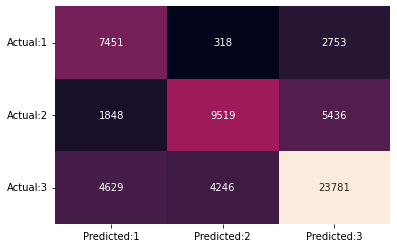

In [76]:
## Visualization of the Confusion_Matrix
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:2','Predicted:3'], index = ['Actual:1','Actual:2','Actual:3'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd' , cbar = False)
plt.xticks(fontsize = 10)
plt.yticks(rotation=0,fontsize = 10)
plt.show()


In [77]:
## Probability of each Class of y_pred for train data 'xtr'
model.predict_proba(xtr_con)[0:10]

array([[0.43927347, 0.33656062, 0.22416591],
       [0.03945748, 0.13695559, 0.82358693],
       [0.02162851, 0.17775202, 0.80061947],
       [0.02466568, 0.07763847, 0.89769584],
       [0.04864891, 0.05893446, 0.89241663],
       [0.04784012, 0.1590054 , 0.79315448],
       [0.00355885, 0.80350223, 0.19293892],
       [0.13499379, 0.06540981, 0.7995964 ],
       [0.00596111, 0.68396961, 0.31006928],
       [0.06106523, 0.16842033, 0.77051444]])

In [78]:
Y_train_pred[0:10]

array([0, 2, 2, 2, 2, 2, 1, 2, 1, 2])

In [79]:
### Predicting on test data

Y_test_pred=model.predict(xte_con)

Y_test_pred

array([2, 1, 1, ..., 2, 1, 1])

In [80]:
# calculate various performance measures
acc_table = classification_report(Y_train, Y_train_pred)
# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.53      0.71      0.61     10522
           1       0.68      0.57      0.62     16803
           2       0.74      0.73      0.74     32656

    accuracy                           0.68     59981
   macro avg       0.65      0.67      0.65     59981
weighted avg       0.69      0.68      0.68     59981



In [81]:
# calculate various performance measures
acc_table = classification_report(Y_test, Y_test_pred)
# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.57      0.15      0.23      2617
           1       0.33      0.95      0.49      4164
           2       0.87      0.24      0.38      8215

    accuracy                           0.42     14996
   macro avg       0.59      0.45      0.37     14996
weighted avg       0.67      0.42      0.38     14996



### 2. Random Forest

In [82]:
rf_bl = RandomForestClassifier(max_features=15 , max_depth=12)
rf_bl.fit(X_train , Y_train)
Y_train_pred_rf = rf_bl.predict(X_train)
Y_test_pred_rf = rf_bl.predict(X_test)

In [83]:
Train_acc_table=classification_report(Y_train,Y_train_pred_rf)
print(Train_acc_table)

              precision    recall  f1-score   support

           0       0.65      0.77      0.71     10522
           1       0.81      0.79      0.80     16803
           2       0.84      0.80      0.82     32656

    accuracy                           0.79     59981
   macro avg       0.77      0.79      0.78     59981
weighted avg       0.80      0.79      0.80     59981



In [85]:
Test_acc_table=classification_report(Y_test,Y_test_pred_rf)
print(Test_acc_table)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      2617
           1       0.75      0.74      0.74      4164
           2       0.81      0.77      0.79      8215

    accuracy                           0.76     14996
   macro avg       0.73      0.75      0.74     14996
weighted avg       0.76      0.76      0.76     14996



### 3. XGBoost

In [84]:
from xgboost import XGBClassifier
xgb_bl = XGBClassifier(max_depth = 5 , learning_rate = 0.1 , n_estimators= 5, random_state=42)
xgb_bl.fit(X_train , Y_train)
Y_train_pred_xgb = xgb_bl.predict(X_train)
Y_test_pred_xgb = xgb_bl.predict(X_test)

In [86]:
Train_acc_table=classification_report(Y_train,Y_train_pred_xgb)
print(Train_acc_table)

              precision    recall  f1-score   support

           0       0.57      0.72      0.64     10522
           1       0.73      0.70      0.72     16803
           2       0.80      0.75      0.77     32656

    accuracy                           0.73     59981
   macro avg       0.70      0.72      0.71     59981
weighted avg       0.74      0.73      0.73     59981



In [87]:
Train_acc_table=classification_report(Y_test.astype('int'),Y_test_pred_xgb)
print(Train_acc_table)

              precision    recall  f1-score   support

           0       0.57      0.72      0.63      2617
           1       0.71      0.68      0.69      4164
           2       0.79      0.75      0.77      8215

    accuracy                           0.72     14996
   macro avg       0.69      0.71      0.70     14996
weighted avg       0.73      0.72      0.72     14996



In [1260]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59787 entries, 58306 to 6968
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 59787 non-null  float64
 1   Annual_Income                                       59787 non-null  float64
 2   Interest_Rate                                       59787 non-null  float64
 3   Delay_from_due_date                                 59787 non-null  float64
 4   Num_of_Delayed_Payment                              59787 non-null  float64
 5   Changed_Credit_Limit                                59787 non-null  float64
 6   Outstanding_Debt                                    59787 non-null  float64
 7   Credit_Utilization_Ratio                            59787 non-null  float64
 8   Total_EMI_per_month                                 59787 non-null  float

## Feature Selection and Feature Enginering

In [91]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74977 entries, 0 to 98951
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 74977 non-null  float64
 1   Annual_Income                                       74977 non-null  float64
 2   Interest_Rate                                       74977 non-null  float64
 3   Delay_from_due_date                                 74977 non-null  float64
 4   Num_of_Delayed_Payment                              74977 non-null  float64
 5   Changed_Credit_Limit                                74977 non-null  float64
 6   Outstanding_Debt                                    74977 non-null  float64
 7   Credit_Utilization_Ratio                            74977 non-null  float64
 8   Total_EMI_per_month                                 74977 non-null  float64


In [99]:
#selecting all the numerical features
f_num=df4.iloc[:,[0,1,2,3,4,5,6,7,8,9,12,13,15]]
f_num.head()

Age  Annual_Income  Interest_Rate  Delay_from_due_date  \
0  23.0        19115.0            3.0                  3.0   
1  23.0        19115.0            3.0                  1.0   
2  23.0        19115.0            3.0                  3.0   
3  23.0        19115.0            3.0                  5.0   
4  23.0        19115.0            3.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
0                     7.0                 11.27            809.98   
1                    14.0                 11.27            809.98   
2                     7.0                  9.41            809.98   
3                     4.0                  6.27            809.98   
4                    14.0                 11.27            809.98   

   Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  \
0                 26.822620            49.574949                80.415295   
1                 31.944960            49.574949               118.280222   
2                 28.609352            49.574949                81.699521   
3                 31.377862            49.574949               199.458074   
4                 24.797347            49.574949                41.420153   

   Num_of_Loan  Num_Credit_Inquiries  Month_August  
0            4                     4             0  
1            4                     4             0  
2            4                     4             0  
3            4                     4             0  
4            4                     4             0

In [100]:
f_num.shape

(74977, 13)

In [94]:
f_obj=df4.iloc[:,[10,11,16,17,18]]
f_obj.head()

Num_Bank_Accounts  Num_Credit_Card  Month_February  Month_January  \
0                  3                4               0              1   
1                  3                4               1              0   
2                  3                4               0              0   
3                  3                4               0              0   
4                  3                4               0              0   

   Month_July  
0           0  
1           0  
2           0  
3           0  
4           0

In [95]:
f_obj.shape

(74977, 5)

### 1.Checking for Multicollinearity (NUM)

In [101]:
f_num.corr()

Age  Annual_Income  Interest_Rate  \
Age                       1.000000       0.078990      -0.207942   
Annual_Income             0.078990       1.000000      -0.242259   
Interest_Rate            -0.207942      -0.242259       1.000000   
Delay_from_due_date      -0.163732      -0.187235       0.541097   
Num_of_Delayed_Payment   -0.164649      -0.200312       0.505281   
Changed_Credit_Limit     -0.153529      -0.124027       0.311849   
Outstanding_Debt         -0.198918      -0.231836       0.607485   
Credit_Utilization_Ratio  0.020201       0.194766      -0.062477   
Total_EMI_per_month      -0.078616       0.480362       0.147034   
Amount_invested_monthly   0.037984       0.458375      -0.131409   
Num_of_Loan              -0.199049      -0.232477       0.507642   
Num_Credit_Inquiries     -0.252598      -0.234403       0.615050   
Month_August              0.000222      -0.004110       0.000732   

                          Delay_from_due_date  Num_of_Delayed_Payment  \
Age                                 -0.163732               -0.164649   
Annual_Income                       -0.187235               -0.200312   
Interest_Rate                        0.541097                0.505281   
Delay_from_due_date                  1.000000                0.484926   
Num_of_Delayed_Payment               0.484926                1.000000   
Changed_Credit_Limit                 0.225425                0.249753   
Outstanding_Debt                     0.508131                0.427803   
Credit_Utilization_Ratio            -0.051739               -0.055264   
Total_EMI_per_month                  0.137174                0.111607   
Amount_invested_monthly             -0.102855               -0.104964   
Num_of_Loan                          0.433438                0.394933   
Num_Credit_Inquiries                 0.497697                0.435803   
Month_August                         0.000346                0.002019   

                          Changed_Credit_Limit  Outstanding_Debt  \
Age                                  -0.153529         -0.198918   
Annual_Income                        -0.124027         -0.231836   
Interest_Rate                         0.311849          0.607485   
Delay_from_due_date                   0.225425          0.508131   
Num_of_Delayed_Payment                0.249753          0.427803   
Changed_Credit_Limit                  1.000000          0.339064   
Outstanding_Debt                      0.339064          1.000000   
Credit_Utilization_Ratio             -0.036222         -0.064650   
Total_EMI_per_month                   0.100541          0.169984   
Amount_invested_monthly              -0.068544         -0.118055   
Num_of_Loan                           0.286776          0.573733   
Num_Credit_Inquiries                  0.342689          0.588006   
Month_August                          0.001779          0.001374   

                          Credit_Utilization_Ratio  Total_EMI_per_month  \
Age                                       0.020201            -0.078616   
Annual_Income                             0.194766             0.480362   
Interest_Rate                            -0.062477             0.147034   
Delay_from_due_date                      -0.051739             0.137174   
Num_of_Delayed_Payment                   -0.055264             0.111607   
Changed_Credit_Limit                     -0.036222             0.100541   
Outstanding_Debt                         -0.064650             0.169984   
Credit_Utilization_Ratio                  1.000000             0.028138   
Total_EMI_per_month                       0.028138             1.000000   
Amount_invested_monthly                   0.023998             0.248096   
Num_of_Loan                              -0.090208             0.503649   
Num_Credit_Inquiries                     -0.069085             0.170692   
Month_August                              0.004141             0.012608   

                          Amount_invested_monthly  

#### Calculate VIF of each variable

In [102]:
f_num_vif=f_num.copy()
f_num_vif.shape

(74977, 13)

In [103]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(f_num.values, i) for i in range(f_num.shape[1])]

# create a column of variable names
vif["Features"] = f_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                  Features
0    18.162071  Credit_Utilization_Ratio
1     9.154183               Num_of_Loan
2     9.018347                       Age
3     8.683220    Num_of_Delayed_Payment
4     8.027718             Interest_Rate
5     6.950265             Annual_Income
6     6.292080      Num_Credit_Inquiries
7     6.077255          Outstanding_Debt
8     5.740342       Total_EMI_per_month
9     5.613548       Delay_from_due_date
10    4.278028      Changed_Credit_Limit
11    4.130355   Amount_invested_monthly
12    1.139573              Month_August

In [104]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for index in range(len(f_num_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(f_num_vif.values, i) for i in range(f_num_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = f_num_vif.columns
    
    vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        f_num_vif = f_num_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                 Features
0     5.758292                      Age
1     5.987714            Annual_Income
2     7.993830            Interest_Rate
3     5.604770      Delay_from_due_date
4     8.272947   Num_of_Delayed_Payment
5     4.149135     Changed_Credit_Limit
6     6.075604         Outstanding_Debt
7     5.498523      Total_EMI_per_month
8     4.066738  Amount_invested_monthly
9     8.861075              Num_of_Loan
10    6.262728     Num_Credit_Inquiries
11    1.135215             Month_August


### 2.Feature selection using mutual_info_classif(NUM)

In [105]:
l=xtr.index
print(l)

Int64Index([41848, 37442, 18882, 83196, 75900, 59023, 68332, 17903, 42853,
            17263,
            ...
            48121, 41464, 57931, 10393, 64899, 27463, 28583, 96817, 66173,
             6966],
           dtype='int64', length=59981)


In [106]:
from sklearn.feature_selection import mutual_info_classif
## determine the mutual info
mutual_info=mutual_info_classif(f_num.loc[l,:],Y_train)
mutual_info

array([0.02762045, 0.54488392, 0.18248677, 0.11444662, 0.07434227,
       0.0999178 , 0.57835599, 0.        , 0.51973129, 0.        ,
       0.08494647, 0.11995019, 0.        ])

In [107]:
f_num.shape

(74977, 13)

In [108]:
mi=pd.Series(mutual_info,index=f_num.columns)
mi

Age                         0.027620
Annual_Income               0.544884
Interest_Rate               0.182487
Delay_from_due_date         0.114447
Num_of_Delayed_Payment      0.074342
Changed_Credit_Limit        0.099918
Outstanding_Debt            0.578356
Credit_Utilization_Ratio    0.000000
Total_EMI_per_month         0.519731
Amount_invested_monthly     0.000000
Num_of_Loan                 0.084946
Num_Credit_Inquiries        0.119950
Month_August                0.000000
dtype: float64

In [109]:
mi.sort_values(ascending=False)

Outstanding_Debt            0.578356
Annual_Income               0.544884
Total_EMI_per_month         0.519731
Interest_Rate               0.182487
Num_Credit_Inquiries        0.119950
Delay_from_due_date         0.114447
Changed_Credit_Limit        0.099918
Num_of_Loan                 0.084946
Num_of_Delayed_Payment      0.074342
Age                         0.027620
Credit_Utilization_Ratio    0.000000
Amount_invested_monthly     0.000000
Month_August                0.000000
dtype: float64

In [110]:
###List of  independant features having Mutual Info Greater than 0.05 wrt to target
l_mi=mi[mi>0.05].index.tolist()
print(l_mi)

['Annual_Income', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Inquiries']


Here we can see that 'Age', 'Credit_Utilization_Ratio', 'Amount_invested_monthly' does not give any Mutual Information wrt to our Target Variable i.e 'Credit_Score', hence removing them for further analysis.

 ### 3.Feature Selection using Mutual Info(CAT)

In [1242]:
## This can be used for independant features that are categorical in nature 
## Imp to do label encoding of the independant features before using the feature selection method

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
for i in f_obj.columns:
    f_obj[i]=le.fit_transform(f_obj[i])
f_obj.head(24)

Num_Bank_Accounts  Num_Credit_Card  Month_February  Month_January  \
0                   3                4               0              1   
1                   3                4               1              0   
2                   3                4               0              0   
3                   3                4               0              0   
4                   3                4               0              0   
5                   3                4               0              0   
6                   3                4               0              0   
7                   3                4               0              0   
8                   2                4               0              1   
9                   2                4               1              0   
10                  2                4               0              0   
11                  2                4               0              0   
12                  2                4               0              0   
13                  2                4               0              0   
14                  2                4               0              0   
15                  2                4               0              0   
16                  1                5               0              1   
17                  1                5               1              0   
18                  1                5               0              0   
20                  1                5               0              0   
21                  1                5               0              0   
22                  1                5               0              0   
23                  1                5               0              0   
24                  2                5               0              1   

    Month_July  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            1  
7            0  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           1  
15           0  
16           0  
17           0  
18           0  
20           0  
21           0  
22           1  
23           0  
24           0

In [113]:
mutual_info_cat=mutual_info_classif(f_obj.loc[l,:],Y_train)
mutual_info_cat

array([0.09616027, 0.1091727 , 0.00052175, 0.        , 0.00134687])

In [114]:
mi_cat=pd.Series(mutual_info_cat,index=f_obj.columns)
mi_cat.sort_values(ascending=False)

Num_Credit_Card      0.109173
Num_Bank_Accounts    0.096160
Month_July           0.001347
Month_February       0.000522
Month_January        0.000000
dtype: float64

In [115]:
mi_cat.mean()

0.0414403193704437

In [116]:
#considering features having mututal info score greater and close to 0.06, that is the mean value.
mi_imp_feat=mi_cat[mi_cat>0.06]
mi_imp_feat

Num_Bank_Accounts    0.096160
Num_Credit_Card      0.109173
dtype: float64

### Numerical features to be dropped:
*Credit_ulilisation, Amount_invested_monthly, Age, Num_Credit_Card*
### Discrete features to be dropped:
*Occupation, Month, Payment_Behaviour*

In [1249]:
xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59787 entries, 58306 to 6968
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 59787 non-null  float64
 1   Annual_Income                                       59787 non-null  float64
 2   Interest_Rate                                       59787 non-null  float64
 3   Delay_from_due_date                                 59787 non-null  float64
 4   Num_of_Delayed_Payment                              59787 non-null  float64
 5   Changed_Credit_Limit                                59787 non-null  float64
 6   Outstanding_Debt                                    59787 non-null  float64
 7   Credit_Utilization_Ratio                            59787 non-null  float64
 8   Total_EMI_per_month                                 59787 non-null  float

In [117]:
# Modified Train Data
xtr_modf=xtr.iloc[:,[1,2,3,4,5,6,8,10,12,13,35,36,37]]
xtr_modf.head()

Annual_Income  Interest_Rate  Delay_from_due_date  \
41848      -0.423699      -0.940564            -0.330397   
37442       0.636143      -0.702032             0.389157   
18882      -0.370891       0.729165             0.469107   
83196       0.152847       0.490633            -0.650199   
75900      -0.861214      -0.940564            -0.570249   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
41848               -1.197563             -1.466447         -1.037521   
37442                0.160035              1.142307          0.236941   
18882                0.669134              0.662842         -1.281297   
83196                0.160035              0.188372         -1.214857   
75900                0.160035             -0.154578         -0.708766   

       Total_EMI_per_month  Num_Bank_Accounts  Num_of_Loan  \
41848            -0.132704          -1.673802     0.315374   
37442            -0.014630           0.305558    -0.558931   
18882            -0.787815          -0.486186    -0.996084   
83196            -0.014252          -0.882058    -0.121778   
75900            -0.588501          -0.090314     0.315374   

       Num_Credit_Inquiries  Credit_Mix_Good  Credit_Mix_Standard  \
41848              0.157153                1                    0   
37442              1.233723                0                    1   
18882             -0.111990                0                    1   
83196             -1.188560                0                    1   
75900             -0.650275                0                    1   

       Payment_of_Min_Amount_Yes  
41848                          1  
37442                          1  
18882                          1  
83196                          0  
75900                          0

In [118]:
# Modified Test Data
xte_modf=xte.iloc[:,[1,2,3,4,5,6,8,10,12,13,35,36,37]]
xte_modf.head()

Annual_Income  Interest_Rate  Delay_from_due_date  \
49349       1.273430      -0.798441            -0.166940   
52349       1.540989      -0.650275            -0.696453   
70054       1.645681      -0.855882             0.016452   
62995       1.379177      -0.919418            -1.457703   
41748       1.029174      -0.347999            -0.798441   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
49349                2.848579             -0.585581          6.643937   
52349                1.772009             -0.367426          7.519203   
70054                1.233723             -0.227865          5.664159   
62995               -0.111990             -0.685118          1.018117   
41748                1.772009             -0.646694          6.314557   

       Total_EMI_per_month  Num_Bank_Accounts  Num_of_Loan  \
49349            -1.457703          -0.650275    -1.457703   
52349             2.013450           0.695438    -0.650275   
70054            -1.457703           0.157153    -1.457703   
62995            -1.457703          -1.188560    -1.457703   
41748            -0.411829          -0.650275    -0.919418   

       Num_Credit_Inquiries  Credit_Mix_Good  Credit_Mix_Standard  \
49349             -0.650275                0                    1   
52349              0.695438                0                    1   
70054              0.426295                0                    1   
62995             -1.188560                1                    0   
41748             -0.919418                0                    1   

       Payment_of_Min_Amount_Yes  
49349                          0  
52349                          1  
70054                          1  
62995                          0  
41748                          0

In [119]:
#Data for other models
xtr_modf1=X_train.iloc[:,[1,2,3,4,5,6,8,10,12,13,35,36,37]]
xte_modf1=X_test.iloc[:,[1,2,3,4,5,6,8,10,12,13,35,36,37]]

In [120]:
# Creating a comparative score card of all models for train data
final_result_train = pd.DataFrame(columns=['Model Name','Accuracy','PRECISION','F1-SCORE','RECALL'])

def result_update_train(model_name,ytrain,ypred):
    global final_result_train
    model_result = {'Model Name':model_name,
                   'Accuracy':round(accuracy_score(ytrain,ypred),3),
                   'PRECISION':round(precision_score(ytrain,ypred,average='macro'),3),
                   'F1-SCORE':round(f1_score(ytrain,ypred,average='macro'),3),
                   'RECALL':round(recall_score(ytrain,ypred,average='macro'),3)}
    final_result_train = final_result_train.append(model_result,ignore_index=True)

In [121]:
# Creating a comparative score card of all models for test data
final_result_test = pd.DataFrame(columns=['Model Name','Accuracy','PRECISION','F1-SCORE','RECALL'])

def result_update_test(model_name,ytest,ypred):
    global final_result_test
    model_result = {'Model Name':model_name,
                   'Accuracy':round(accuracy_score(ytest,ypred),3),
                   'PRECISION':round(precision_score(ytest,ypred,average='macro'),3),
                   'F1-SCORE':round(f1_score(ytest,ypred,average='macro'),3),
                   'RECALL':round(recall_score(ytest,ypred,average='macro'),3)}
    final_result_test = final_result_test.append(model_result,ignore_index=True)

### Applying Multinomial Logistic Regression Model on selected features.¶

In [122]:
# Adding constant
xtr_modf_con=sm.add_constant(xtr_modf)
xte_modf_con=sm.add_constant(xte_modf)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1,multi_class='ovr')
## Train Model
model_m1=logreg.fit(xtr_modf_con,Y_train)

In [123]:
y_pred_train = model_m1.predict(xtr_modf_con)
result_update_train('MLR',Y_train,y_pred_train)
y_pred_test = model_m1.predict(xte_modf_con)
result_update_test('MLR',Y_test,y_pred_test)

In [124]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtr_modf , Y_train)
KNeighborsClassifier(n_neighbors=7)
y_pred_train = knn.predict(xtr_modf)
result_update_train('KNeighbors',Y_train,y_pred_train)
y_pred_test = knn.predict(xte_modf)
result_update_test('KNeighbors',Y_test,y_pred_test)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtr_modf, Y_train)
y_pred_train = nb.predict(xtr_modf)
result_update_train('Naive Bayes',Y_train,y_pred_train)
y_pred_test = nb.predict(xte_modf)
result_update_test('Naive Bayes',Y_test,y_pred_test)

#XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.1 , n_estimators= 5, random_state=42)
xgb.fit(xtr_modf1 , Y_train)
y_pred_train = xgb.predict(xtr_modf1)
result_update_train('XGBoost Classifier',Y_train,y_pred_train)
y_pred_test = xgb.predict(xte_modf1)
result_update_test('XGBoost Classifier',Y_test,y_pred_test)

#Decision Tree
dt =DecisionTreeClassifier(max_features=10 ,max_depth=12)
dt.fit(xtr_modf1 , Y_train)
DecisionTreeClassifier(max_depth=12, max_features=10)
y_pred_train = xgb.predict(xtr_modf1)
result_update_train('Decision Tree',Y_train,y_pred_train)
y_pred_test = dt.predict(xte_modf1)
result_update_test('Decision Tree',Y_test,y_pred_test)

#Random Forest
rf = RandomForestClassifier(max_features=10 , max_depth=12)
rf.fit(xtr_modf1 , Y_train)
y_pred_train = rf.predict(xtr_modf1)
result_update_train('RandomForest',Y_train,y_pred_train)
y_pred_test = rf.predict(xte_modf1)
result_update_test('RandomForest',Y_test,y_pred_test)

#ADA Boost
ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
ada.fit(xtr_modf1 , Y_train)
AdaBoostClassifier(learning_rate=0.8, n_estimators=8)
y_pred_train = ada.predict(xtr_modf1)
result_update_train('Adaboost',Y_train,y_pred_train)
y_pred_test = ada.predict(xte_modf1)
result_update_test('Adaboost',Y_test,y_pred_test)

#Stack model
#base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 10, 
#                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
#                                                     n_estimators = 50, random_state = 10)),
#                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
#                 ('NB_model', GaussianNB())]

#stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
#stack_model.fit(xtr_modf, Y_train)
#y_pred_train = stack_model.predict(xtr_modf)
#result_update_train('Stacking Classifier',Y_train,y_pred_train)
#y_pred_test = stack_model.predict(xte_modf)
#result_update_test('Stacking Classifier',Y_test,y_pred_test)'''

In [125]:
final_result_train

Model Name  Accuracy  PRECISION  F1-SCORE  RECALL
0                 MLR     0.673      0.649     0.650   0.674
1          KNeighbors     0.829      0.809     0.816   0.824
2         Naive Bayes     0.687      0.668     0.673   0.719
3  XGBoost Classifier     0.721      0.698     0.706   0.740
4       Decision Tree     0.721      0.698     0.706   0.740
5        RandomForest     0.797      0.770     0.782   0.806
6            Adaboost     0.670      0.653     0.647   0.685

In [126]:
final_result_test

Model Name  Accuracy  PRECISION  F1-SCORE  RECALL
0                 MLR     0.416      0.568     0.367   0.445
1          KNeighbors     0.427      0.470     0.370   0.418
2         Naive Bayes     0.366      0.485     0.299   0.396
3  XGBoost Classifier     0.712      0.687     0.694   0.728
4       Decision Tree     0.734      0.704     0.711   0.725
5        RandomForest     0.755      0.726     0.737   0.761
6            Adaboost     0.670      0.651     0.647   0.684

### Applying SMOTE

In [127]:
from imblearn.over_sampling import SMOTE
from collections import Counter
    
oversample = SMOTE()
X_smote,Y_smote = oversample.fit_resample(xtr_modf1,Y_train)

In [132]:
Y_smote = pd.Series(Y_smote)

In [129]:
#Y_train.value_counts()

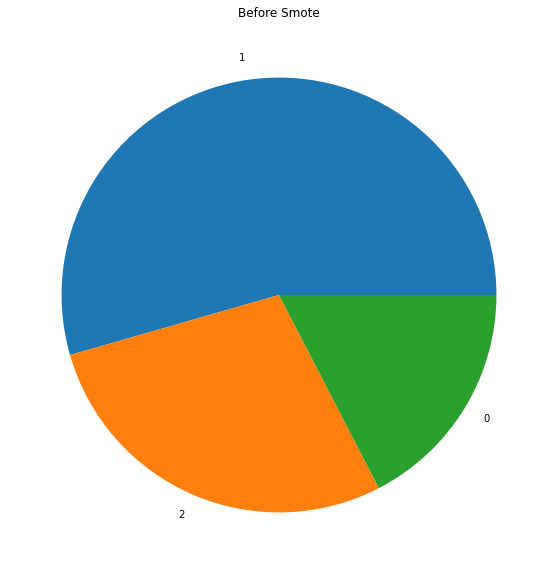

In [130]:
plt.figure(figsize=(15,10))
plt.pie(np.array([32556,16824,10407]),labels=[1,2,0])
plt.title("Before Smote")
plt.show()

Value counts after SMOTE

In [133]:
Y_smote.value_counts()

0    32656
2    32656
1    32656
dtype: int64

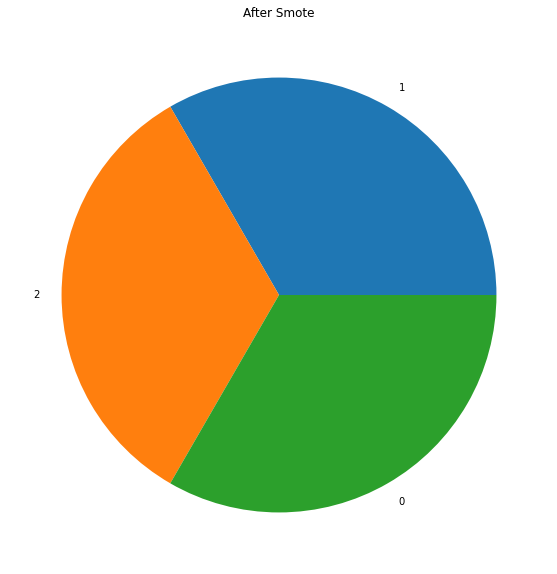

In [134]:
plt.figure(figsize=(15,10))
plt.pie(np.array([32556,32556,32556]),labels=[1,2,0])
plt.title("After Smote")
plt.show()

### Model after Smote

In [135]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.1 , n_estimators= 5, random_state=42)
xgb.fit(X_smote , Y_smote)
xgb_score_train=xgb.score(X_smote , Y_smote)
print('train xgb:',xgb_score_train)
xgb_score_test=xgb.score(xte_modf1 , Y_test)
print('test xgb:',xgb_score_test)

rf = RandomForestClassifier(max_features=15 , max_depth=12)
rf.fit(X_smote , Y_smote)
rf_score_train=rf.score(X_smote , Y_smote)
print('rf train:',rf_score_train)
rf_score_test=rf.score(xte_modf1 , Y_test)
print('rf test:',rf_score_test)

ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
ada.fit(X_smote , Y_smote)
AdaBoostClassifier(learning_rate=0.8, n_estimators=8)
ada_score_train=ada.score(X_smote , Y_smote )
print('ada train:',ada_score_train)
ada_score_test=ada.score(xte_modf1 , Y_test)
print('ada test:',ada_score_test)

from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features=15 ,max_depth=12)
dt.fit(X_smote, Y_smote)
DecisionTreeClassifier(max_depth=12, max_features=15)
dt_score_train=dt.score(X_smote , Y_smote)
print('dt train:',dt_score_train)
dt_score_test=dt.score(xte_modf1 , Y_test)
print('dt test:',dt_score_test)

train xgb: 0.7640556099951005
test xgb: 0.7055881568418245
rf train: 0.8151130981544994
rf test: 0.7300613496932515
ada train: 0.7013820839457782
ada test: 0.6695785542811417
dt train: 0.8054670912951167
dt test: 0.7132568684982662


### Hyperparameter Tuning using GridSearchCV

### Applying Best Parameters obtained from GridSearch

In [136]:
#Updating XGBoost Classifier Tunned into the final result dataframe
xgb_tunned = XGBClassifier(gamma=4,max_depth = 20 , learning_rate = 0.2 , n_estimators= 50, random_state=42)
xgb_tunned.fit(xtr_modf1 , Y_train)
y_pred_train = xgb_tunned.predict(xtr_modf1)
result_update_train('XGBoost Classifier Tunned',Y_train,y_pred_train)
y_pred_test = xgb_tunned.predict(xte_modf1)
result_update_test('XGBoost Classifier Tunned',Y_test,y_pred_test)

#Updating RandomForest Tunned into the final result dataframe
rf_tunned = RandomForestClassifier(criterion='entropy',n_estimators=50,max_features=12 , max_depth=15,
                            min_samples_split=3,min_samples_leaf=2,random_state=42)
rf_tunned.fit(xtr_modf1 , Y_train)
y_pred_train = rf_tunned.predict(xtr_modf1)
result_update_train('RandomForest Tunned',Y_train,y_pred_train)
y_pred_test = rf_tunned.predict(xte_modf1)
result_update_test('RandomForest Tunned',Y_test,y_pred_test)

#Updating Decision Tree Tunned into the final result dataframe
dt_tunned =DecisionTreeClassifier(criterion='entropy',max_features=12 ,max_depth=16,min_samples_leaf=5,
                           min_samples_split=6,random_state=53)
dt_tunned.fit(xtr_modf1 , Y_train)
y_pred_train = dt_tunned.predict(xtr_modf1)
result_update_train('DecisionTree Tunned',Y_train,y_pred_train)
y_pred_test = dt_tunned.predict(xte_modf1)
result_update_test('DecisionTree Tunned',Y_test,y_pred_test)

In [137]:
final_result_train

Model Name  Accuracy  PRECISION  F1-SCORE  RECALL
0                        MLR     0.673      0.649     0.650   0.674
1                 KNeighbors     0.829      0.809     0.816   0.824
2                Naive Bayes     0.687      0.668     0.673   0.719
3         XGBoost Classifier     0.721      0.698     0.706   0.740
4              Decision Tree     0.721      0.698     0.706   0.740
5               RandomForest     0.797      0.770     0.782   0.806
6                   Adaboost     0.670      0.653     0.647   0.685
7  XGBoost Classifier Tunned     0.847      0.834     0.840   0.847
8        RandomForest Tunned     0.847      0.826     0.837   0.851
9        DecisionTree Tunned     0.810      0.790     0.794   0.800

In [153]:
final_result_train.iloc[7]

Model Name    XGBoost Classifier Tunned
Accuracy                          0.847
PRECISION                         0.834
F1-SCORE                           0.84
RECALL                            0.847
Name: 7, dtype: object

In [138]:
final_result_test

Model Name  Accuracy  PRECISION  F1-SCORE  RECALL
0                        MLR     0.416      0.568     0.367   0.445
1                 KNeighbors     0.427      0.470     0.370   0.418
2                Naive Bayes     0.366      0.485     0.299   0.396
3         XGBoost Classifier     0.712      0.687     0.694   0.728
4              Decision Tree     0.734      0.704     0.711   0.725
5               RandomForest     0.755      0.726     0.737   0.761
6                   Adaboost     0.670      0.651     0.647   0.684
7  XGBoost Classifier Tunned     0.799      0.782     0.787   0.793
8        RandomForest Tunned     0.785      0.760     0.770   0.784
9        DecisionTree Tunned     0.754      0.728     0.732   0.736

In [152]:
final_result_test.iloc[7]

Model Name    XGBoost Classifier Tunned
Accuracy                          0.799
PRECISION                         0.782
F1-SCORE                          0.787
RECALL                            0.793
Name: 7, dtype: object

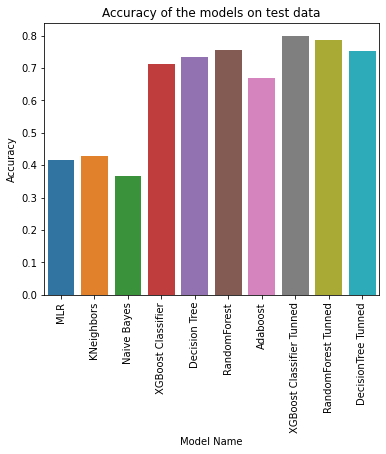

In [139]:
plt.figure(figsize=(6,5))
plt.title('Accuracy of the models on test data')
sns.barplot(x=final_result_test['Model Name'],y=final_result_test['Accuracy'])
plt.xticks(rotation='vertical')
plt.show()

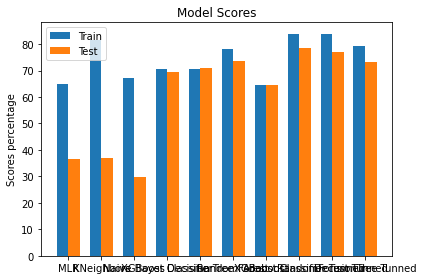

In [140]:

labels = final_result_train['Model Name']
Accuracy_tr = final_result_train['F1-SCORE']*100
Accuracy_te = final_result_test['F1-SCORE']*100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 15))
rects1 = ax.bar(x - width/2, Accuracy_tr, width, label='Train')
rects2 = ax.bar(x + width/2, Accuracy_te, width, label='Test')
ax.set_ylabel('Scores percentage')
ax.set_title('Model Scores')
ax.legend()
plt.xticks(x, labels)
plt.xticks(rotation='vertical')
fig.tight_layout()

plt.show()

Evaluation libraries

### Evaluation of the model using SHAP

In order to understand what are the main features that affect the output of the model, we need Explainable Machine Learning techniques that unravel some of these aspects.
One of these techniques is the SHAP method, used to explain how each feature affects the model, and allows local and global analysis for the dataset and problem at hand.

SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory and used to increase transparency and interpretability of machine learning models.
Consider a coooperative game with the same number of players as the name of features. SHAP will disclose the individual contribution of each player (or feature) on the output of the model, for each example or observation.

In [142]:
pip install shap

In [143]:
import shap
shap.initjs()

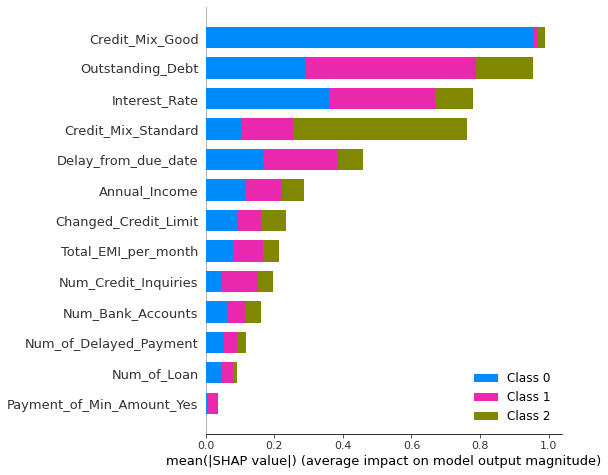

In [144]:
shap_values = shap.TreeExplainer(xgb_tunned).shap_values(xte_modf1)
shap.summary_plot(shap_values, xte_modf1)

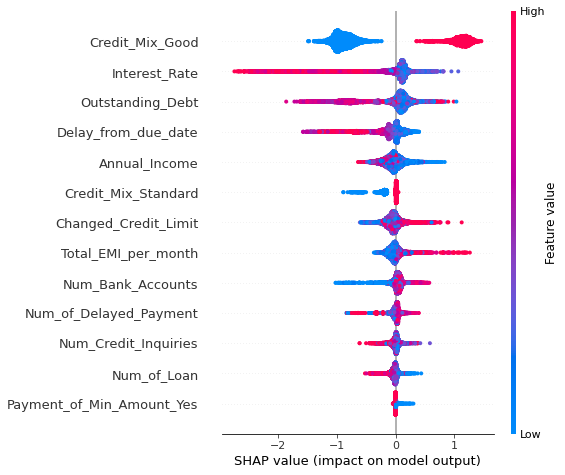

In [145]:
shap_values = shap.TreeExplainer(xgb_tunned).shap_values(xte_modf1)
shap.summary_plot(shap_values[0], xte_modf1)

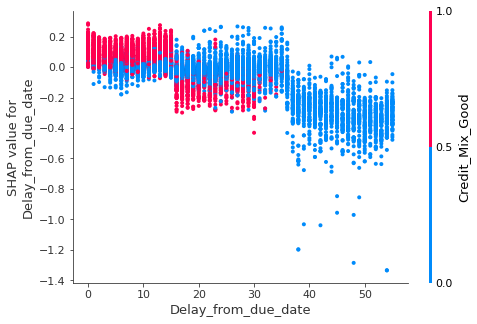

In [146]:
plt.rcParams['figure.figsize']=[15,8]
shap.dependence_plot(2, shap_values[2], xte_modf1.values, feature_names=xte_modf1.columns)

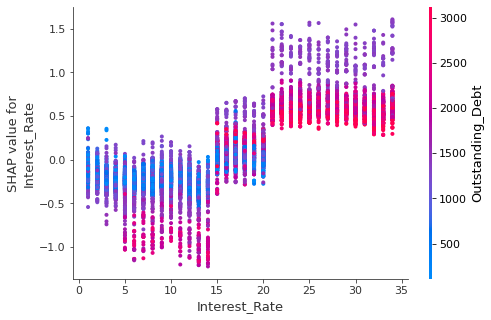

In [147]:
plt.rcParams['figure.figsize']=[15,8]
shap.dependence_plot(1, shap_values[1], xte_modf1.values, feature_names=xte_modf1.columns)

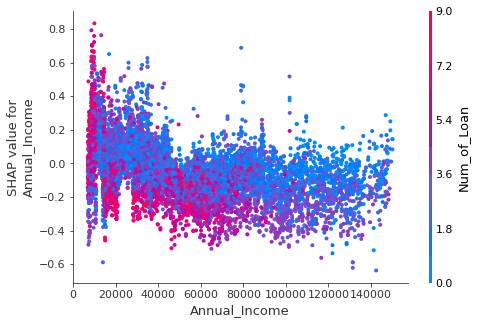

In [148]:
plt.rcParams['figure.figsize']=[15,8]
shap.dependence_plot(0, shap_values[0], xte_modf1.values, feature_names=xte_modf1.columns)

On the beeswarm the features are also ordered by their effect on prediction, but we can also see how higher and lower values of the feature will affect the result.

All the little dots on the plot represent a single observation. The horizontal axis represents the SHAP value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations.

In this example, higher latitudes and longitudes have a negative impact on the prediction, while lower values have a positive impact.